<a href="https://colab.research.google.com/github/Piti220703/Machine-Learning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import re

from collections import OrderedDict
from itertools import permutations
from math import ceil, sqrt

In [ ]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import math

from matplotlib.ticker import StrMethodFormatter
from scipy import stats
from scipy.stats import chi2_contingency, kruskal, contingency, norm
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GermanCredit.csv to GermanCredit.csv


In [ ]:
df = pd.read_csv('GermanCredit.csv')

In [ ]:
df

status  duration                            credit_history  \
0           ... < 100 DM         6   critical account/other credits existing   
1      0 <= ... < 200 DM        48  existing credits paid back duly till now   
2    no checking account        12   critical account/other credits existing   
3           ... < 100 DM        42  existing credits paid back duly till now   
4           ... < 100 DM        24           delay in paying off in the past   
..                   ...       ...                                       ...   
995  no checking account        12  existing credits paid back duly till now   
996         ... < 100 DM        30  existing credits paid back duly till now   
997  no checking account        12  existing credits paid back duly till now   
998         ... < 100 DM        45  existing credits paid back duly till now   
999    0 <= ... < 200 DM        45   critical account/other credits existing   

                 purpose  amount                     savings  \
0    domestic appliances    1169  unknown/no savings account   
1    domestic appliances    5951                ... < 100 DM   
2             retraining    2096                ... < 100 DM   
3       radio/television    7882                ... < 100 DM   
4              car (new)    4870                ... < 100 DM   
..                   ...     ...                         ...   
995     radio/television    1736                ... < 100 DM   
996           car (used)    3857                ... < 100 DM   
997  domestic appliances     804                ... < 100 DM   
998  domestic appliances    1845                ... < 100 DM   
999           car (used)    4576         100 <= ... < 500 DM   

    employment_duration  installment_rate  \
0        ... >= 7 years                 4   
1    1 <= ... < 4 years                 2   
2    4 <= ... < 7 years                 2   
3    4 <= ... < 7 years                 2   
4    1 <= ... < 4 years                 3   
..                  ...               ...   
995  4 <= ... < 7 years                 3   
996  1 <= ... < 4 years                 4   
997      ... >= 7 years                 4   
998  1 <= ... < 4 years                 4   
999          unemployed                 3   

                     personal_status_sex other_debtors  ...  \
0                          male : single          none  ...   
1    female : divorced/separated/married          none  ...   
2                          male : single          none  ...   
3                          male : single     guarantor  ...   
4                          male : single          none  ...   
..                                   ...           ...  ...   
995  female : divorced/separated/married          none  ...   
996            male : divorced/separated          none  ...   
997                        male : single          none  ...   
998                        male : single          none  ...   
999                        male : single          none  ...   

                                              property age  \
0                                          real estate  67   
1                                          real estate  22   
2                                          real estate  49   
3    building society savings agreement/life insurance  45   
4                                  unknown/no property  53   
..                                                 ...  ..   
995                                        real estate  31   
996  building society savings agreement/life insurance  40   
997                                       car or other  38   
998                                unknown/no property  23   
999                                       car or other  27   

     other_installment_plans   housing number_credits  \
0                       none       own              2   
1                       none       own              1   
2                       none       own              1   
3                

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [ ]:
print(df.isnull().sum())

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64


In [ ]:
missing_values = df.isnull().sum()

# One-hot encode categorical columns
categorical_columns = ['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker', 'credit_risk']
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

data_encoded.head(), missing_values

(   duration  amount  installment_rate  present_residence  age  number_credits  \
 0         6    1169                 4                  4   67               2   
 1        48    5951                 2                  2   22               1   
 2        12    2096                 2                  3   49               1   
 3        42    7882                 2                  4   45               1   
 4        24    4870                 3                  4   53               2   
 
    people_liable  status_... >= 200 DM / salary for at least 1 year  \
 0              1                                              False   
 1              1                                              False   
 2              2                                              False   
 3              2                                              False   
 4              2                                              False   
 
    status_0 <= ... < 200 DM  status_no checking account  ...  \
 0     

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Xác định các cột số
numerical_columns = ['duration', 'amount', 'installment_rate', 'present_residence', 'age', 'number_credits', 'people_liable']
scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Check for outliers using IQR method
Q1 = data_encoded[numerical_columns].quantile(0.25)
Q3 = data_encoded[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data_encoded[numerical_columns] < (Q1 - 1.5 * IQR)) | (data_encoded[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

data_encoded.head(), outliers

(   duration    amount  installment_rate  present_residence       age  \
 0 -1.236478 -0.745131          0.918477           1.046987  2.766456   
 1  2.248194  0.949817         -0.870183          -0.765977 -1.191404   
 2 -0.738668 -0.416562         -0.870183           0.140505  1.183312   
 3  1.750384  1.634247         -0.870183           1.046987  0.831502   
 4  0.256953  0.566664          0.024147           1.046987  1.535122   
 
    number_credits  people_liable  \
 0        1.027079      -0.428290   
 1       -0.704926      -0.428290   
 2       -0.704926       2.334869   
 3       -0.704926       2.334869   
 4        1.027079       2.334869   
 
    status_... >= 200 DM / salary for at least 1 year  \
 0                                              False   
 1                                              False   
 2                                              False   
 3                                              False   
 4                                              Fal

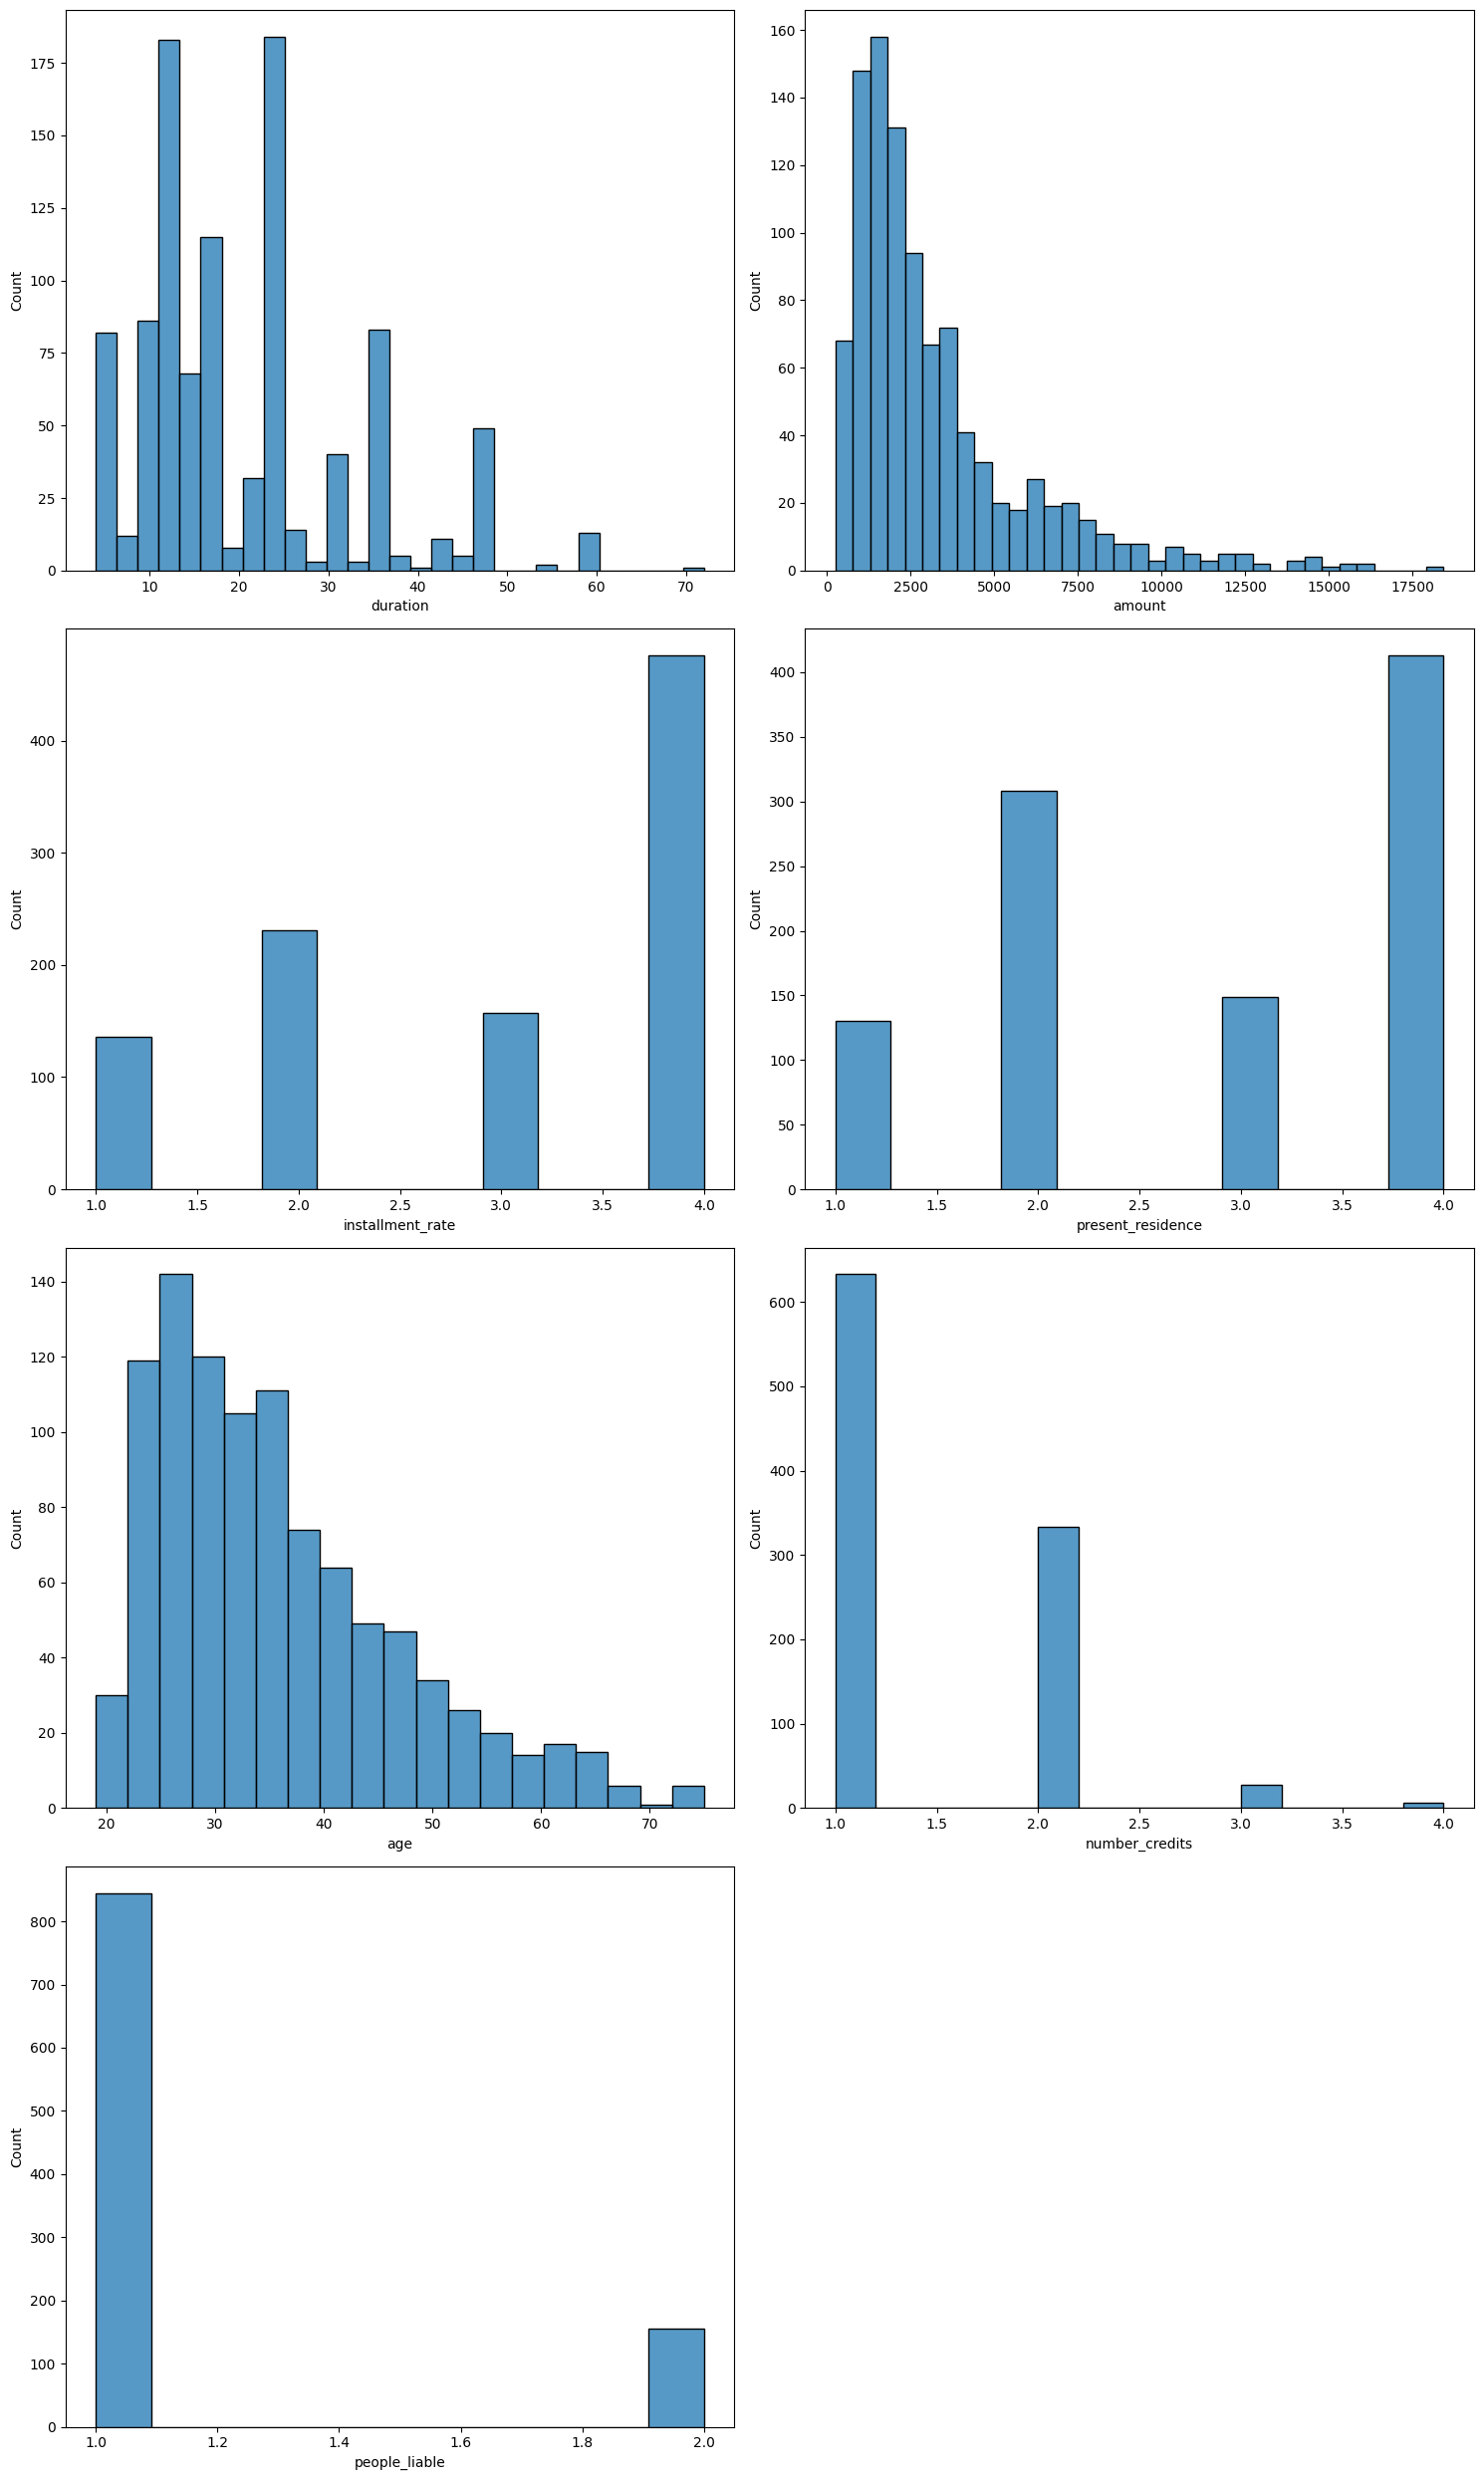

In [ ]:
n_rows = 4
n_cols = 2

# Tạo figure và các axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 25))

# Vẽ biểu đồ phân phối cho từng thuộc tính số
for i, col in enumerate(numerical_columns):
    row = i // n_cols
    col_num = i % n_cols
    sns.histplot(df[col], ax=axes[row, col_num])

# Xóa các ô trống
for j in range(len(numerical_columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Tối ưu hóa khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()

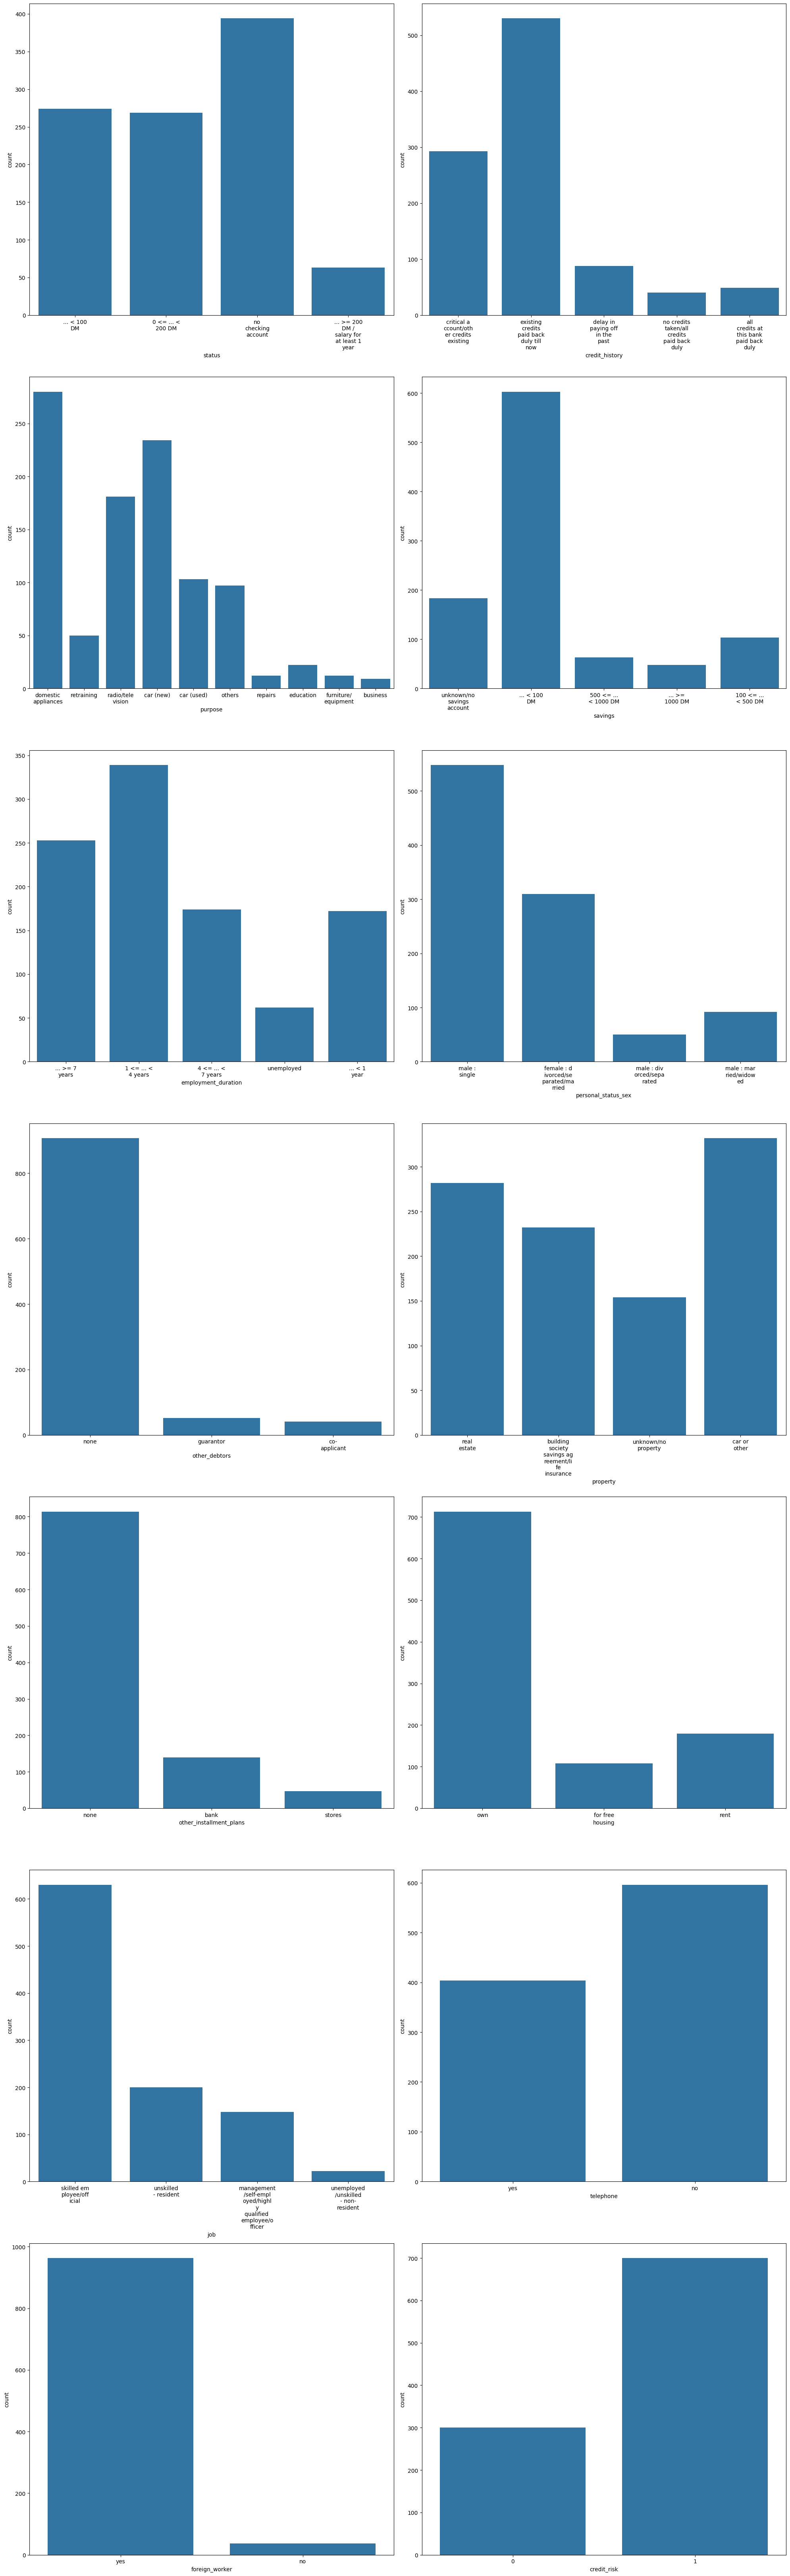

In [ ]:
import textwrap

n_rows = 7
n_cols = 2

# Tạo figure và các axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 65))

# Vẽ biểu đồ phân phối cho từng thuộc tính phân loại
for i, col in enumerate(categorical_columns):
    row = i // n_cols
    col_num = i % n_cols
    sns.countplot(x=col, data=df, ax=axes[row, col_num])
    # Lấy các nhãn hiện tại trên trục x
    labels = axes[row, col_num].get_xticklabels()

    # Sử dụng textwrap để ngắt dòng các nhãn dài
    wrapped_labels = [textwrap.fill(label.get_text(), width=10) for label in labels]
    axes[row, col_num].set_xticklabels(wrapped_labels)

# Tối ưu hóa khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()

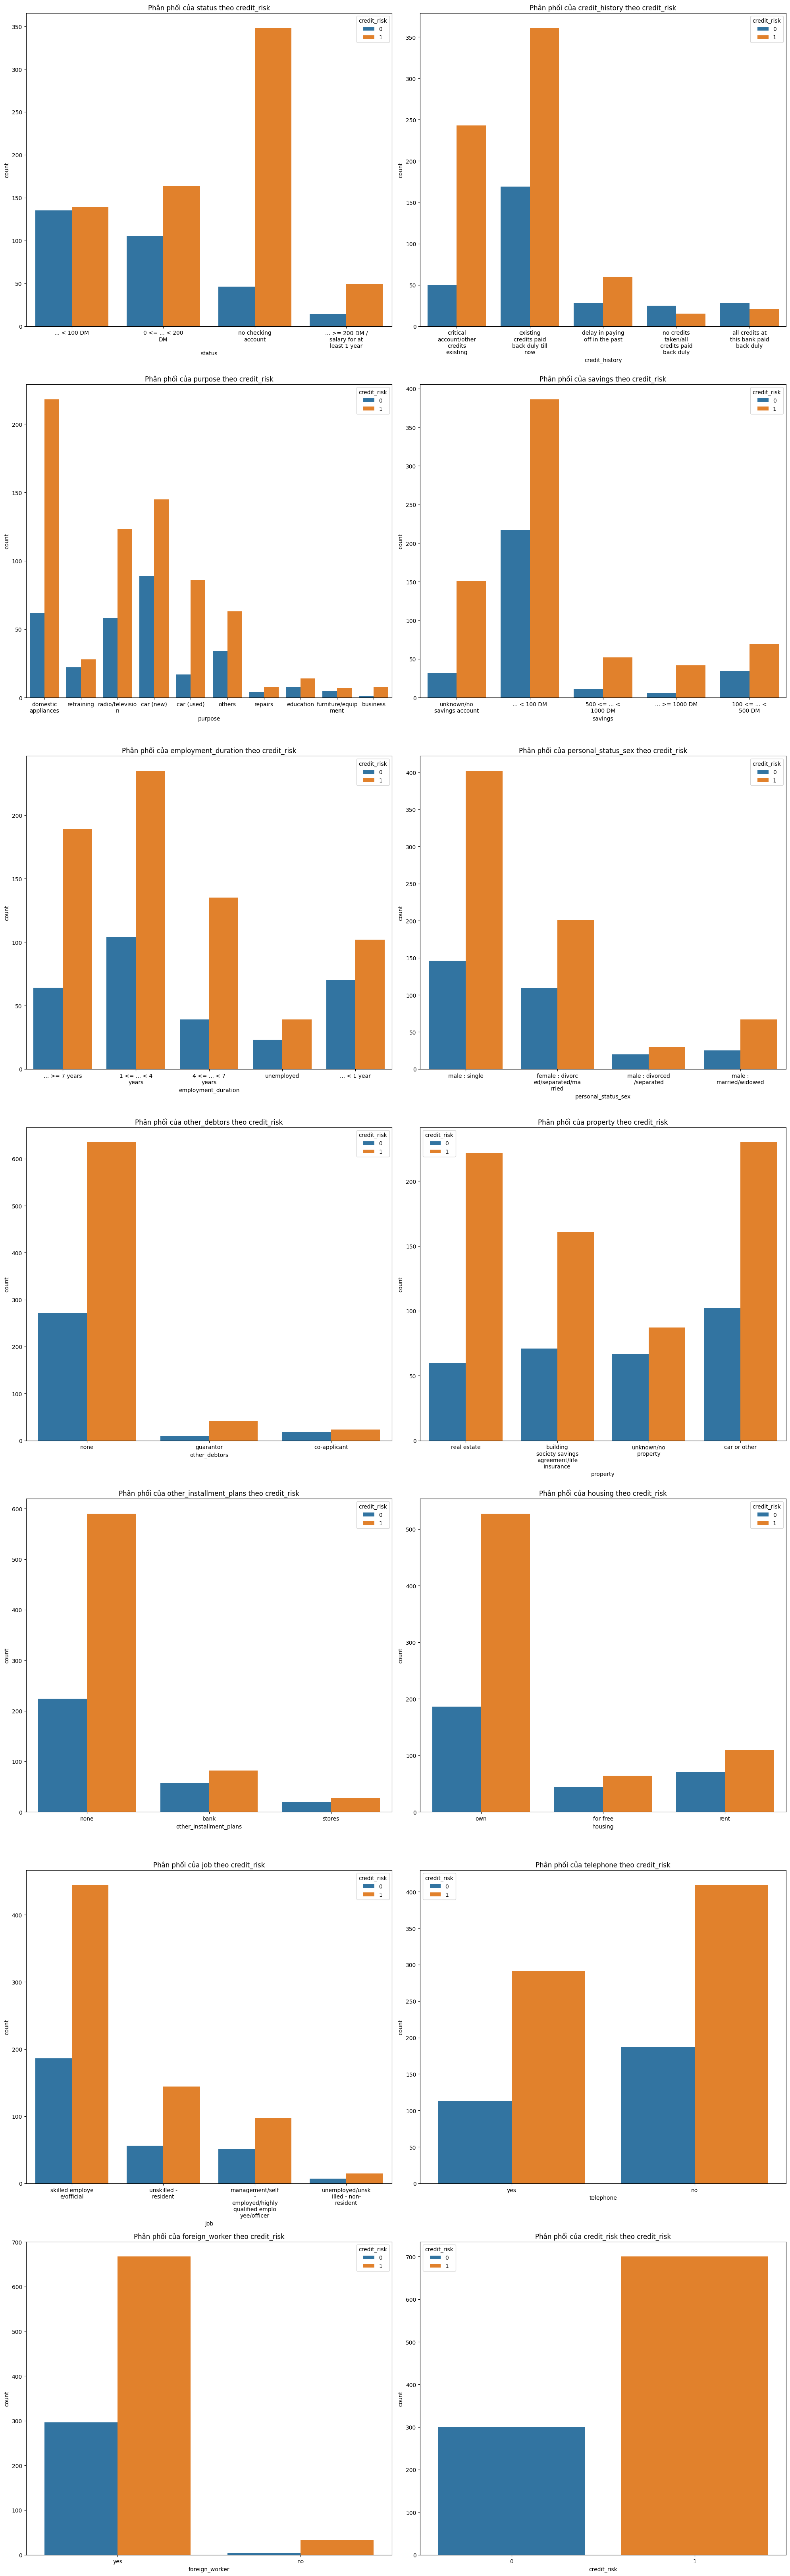

In [ ]:
# Tạo figure và các axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 65))

# Vẽ biểu đồ phân phối của các thuộc tính phân loại theo biến mục tiêu
for i, col in enumerate(categorical_columns):
    row = i // n_cols
    col_num = i % n_cols
    sns.countplot(x=col, hue='credit_risk', data=df, ax=axes[row, col_num])
    axes[row, col_num].set_title(f'Phân phối của {col} theo credit_risk')
    # Lấy các nhãn hiện tại trên trục x
    labels = axes[row, col_num].get_xticklabels()

    # Sử dụng textwrap để ngắt dòng các nhãn dài
    wrapped_labels = [textwrap.fill(label.get_text(), width=15) for label in labels]
    axes[row, col_num].set_xticklabels(wrapped_labels)

# Xóa các ô trống
for j in range(len(categorical_columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Tối ưu hóa khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()

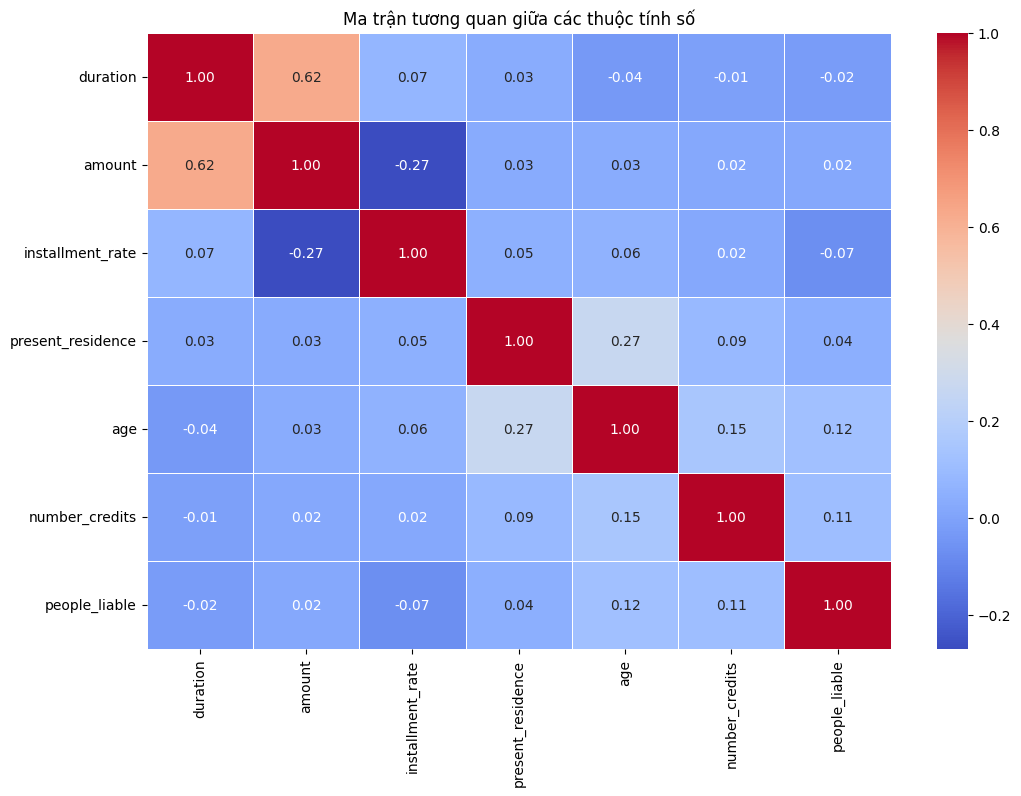

In [ ]:
correlation_matrix = df[numerical_columns].corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Ma trận tương quan giữa các thuộc tính số')
plt.show()

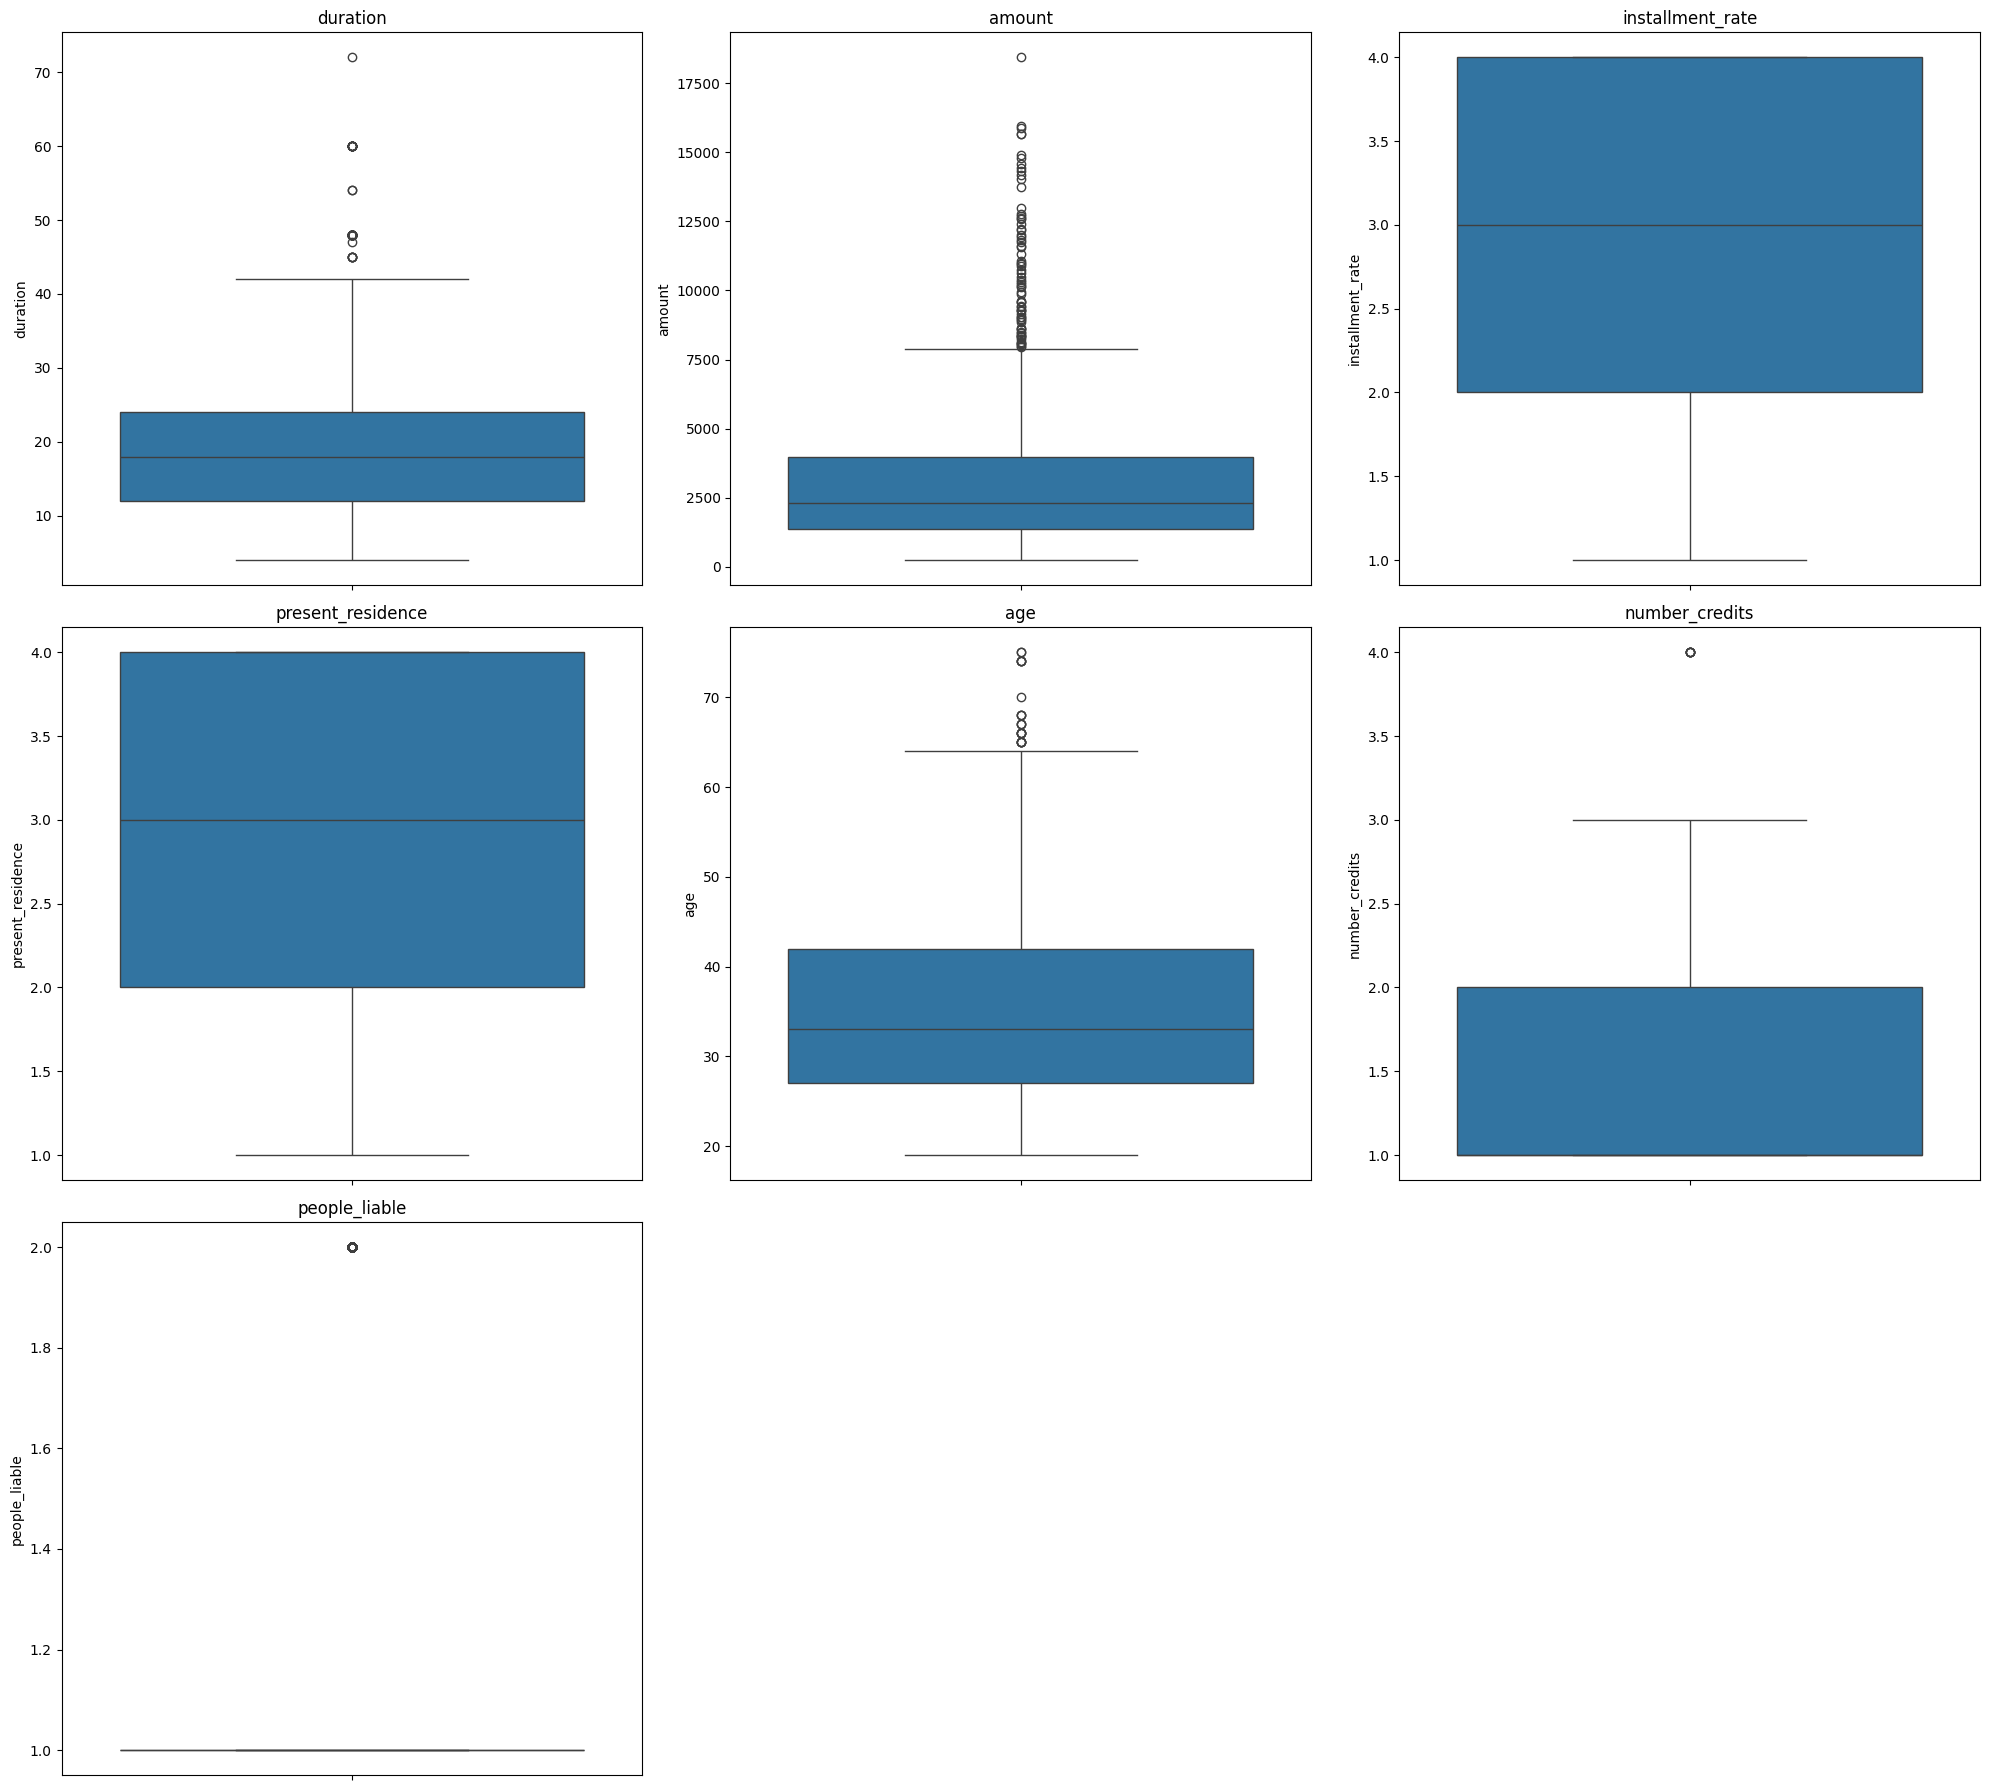

In [ ]:
# Tính số hàng và số cột dựa trên số lượng thuộc tính
n_cols = 3
n_rows = math.ceil(len(numerical_columns) / n_cols)

# Tạo figure và các axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))

# Vẽ biểu đồ boxplot cho từng thuộc tính số
for i, col in enumerate(numerical_columns):
    row = i // n_cols
    col_num = i % n_cols
    sns.boxplot(y=df[col], ax=axes[row, col_num])
    axes[row, col_num].set_title(f'{col}')

# Xóa các ô trống
for j in range(len(numerical_columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Tối ưu hóa khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()

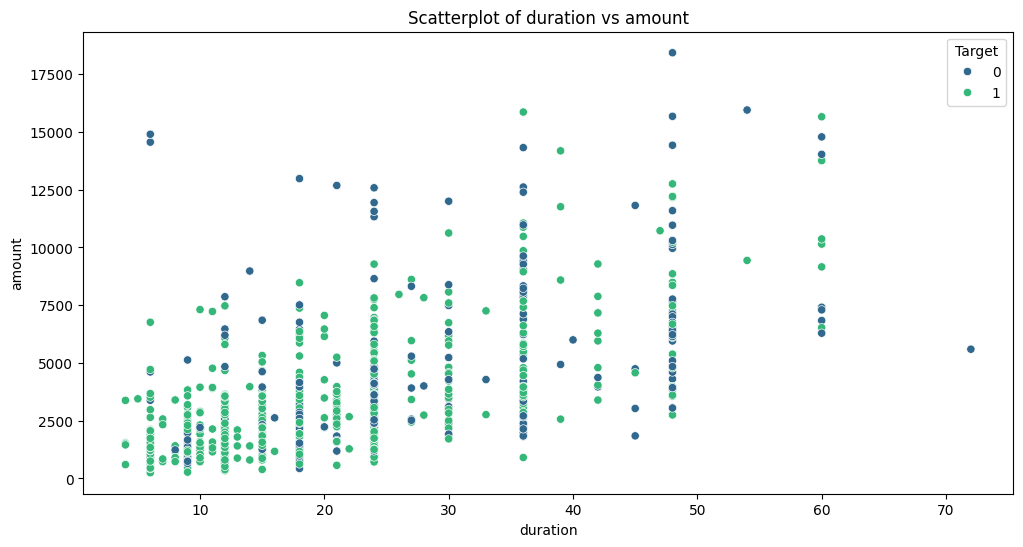

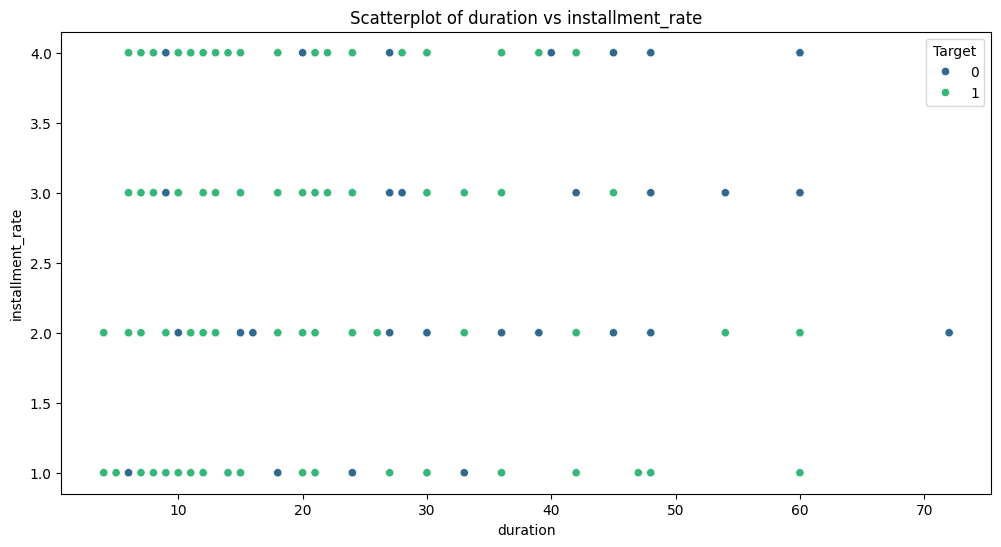

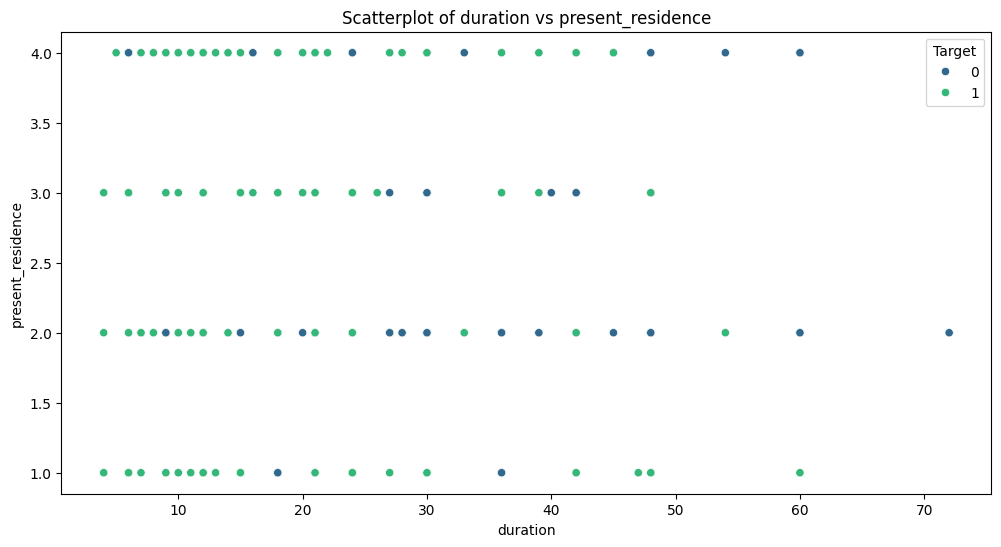

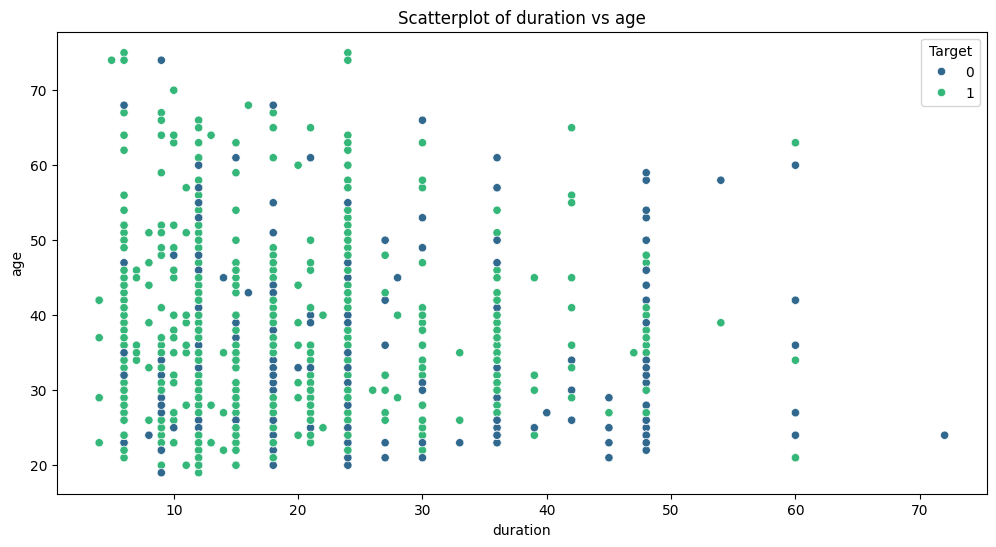

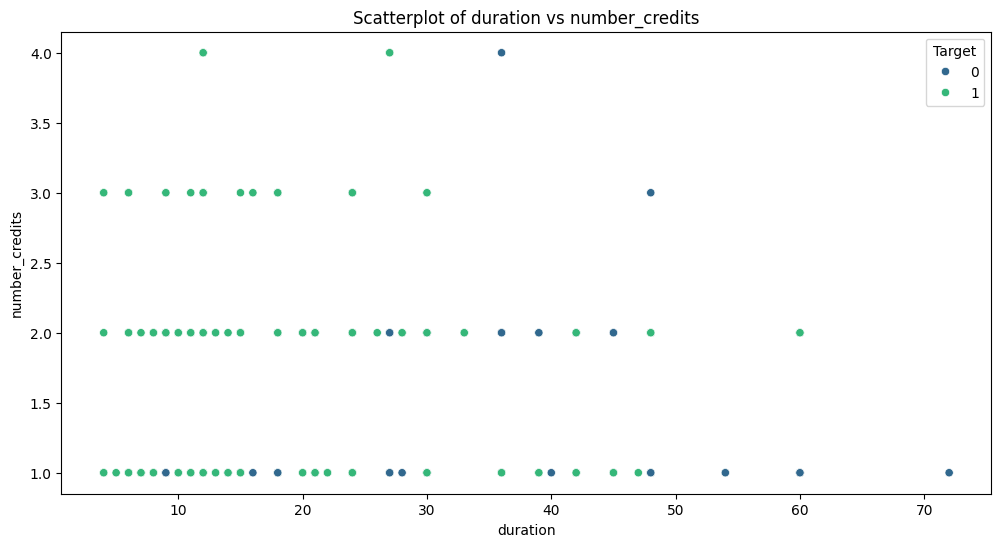

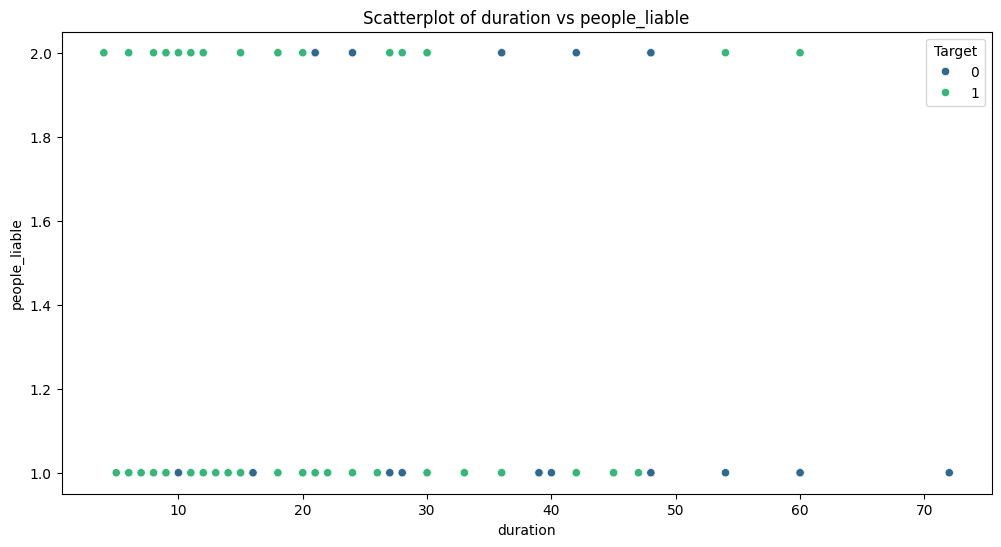

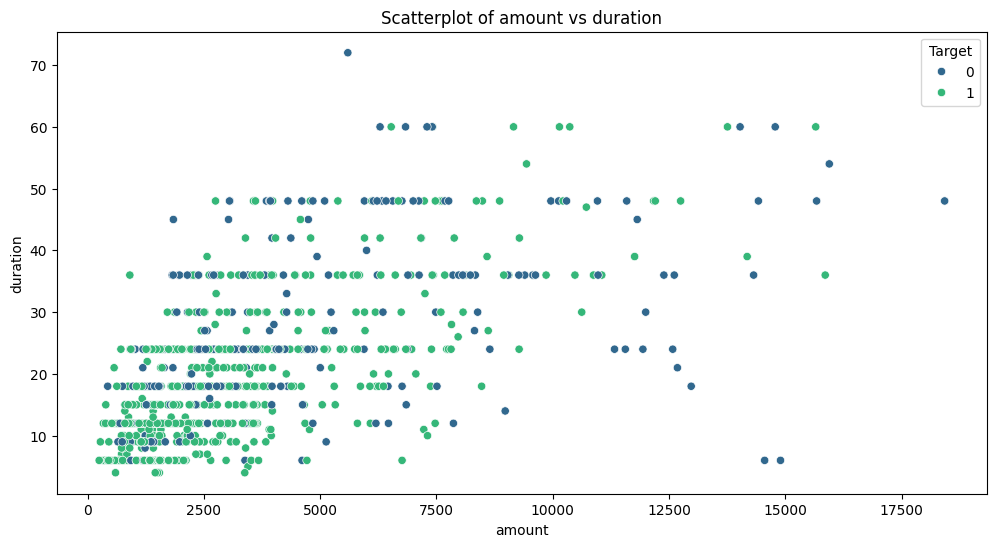

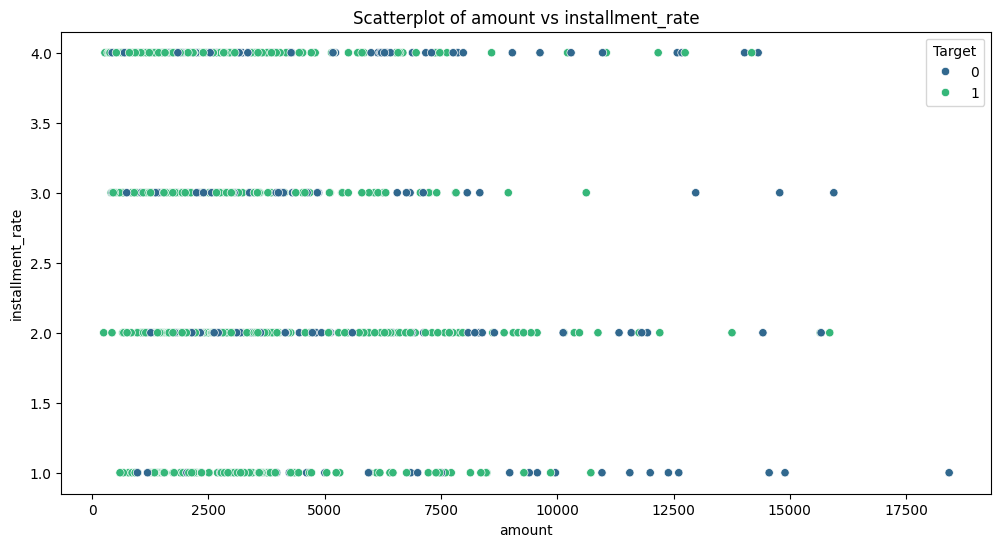

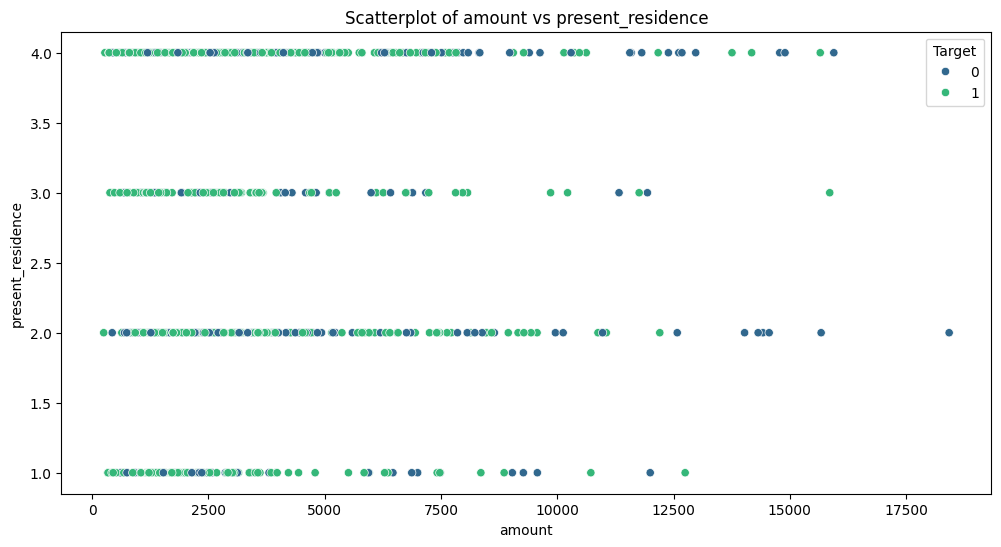

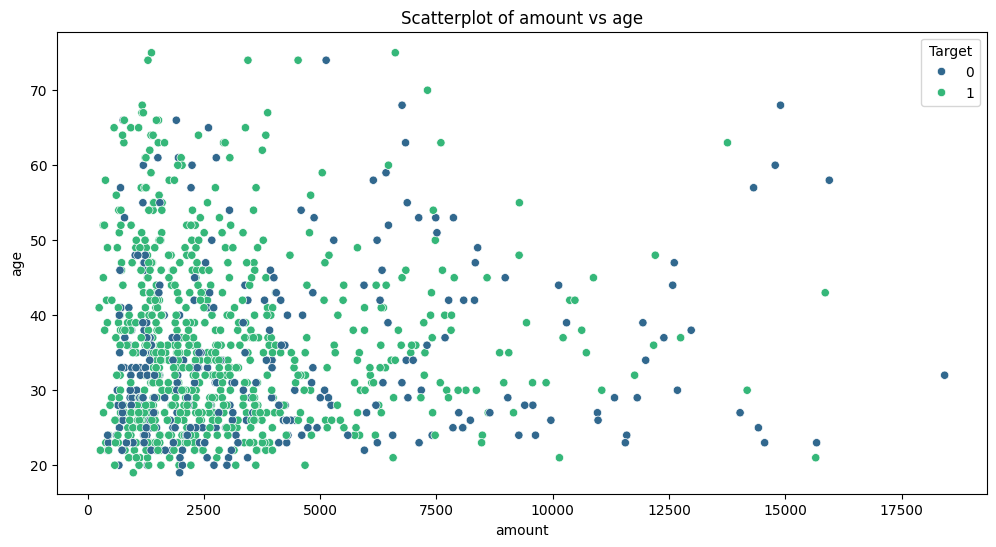

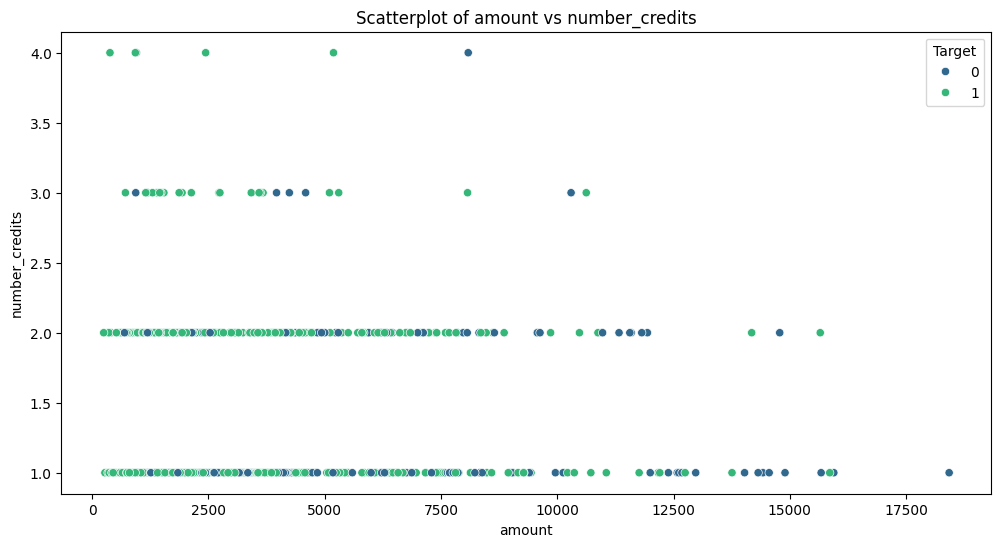

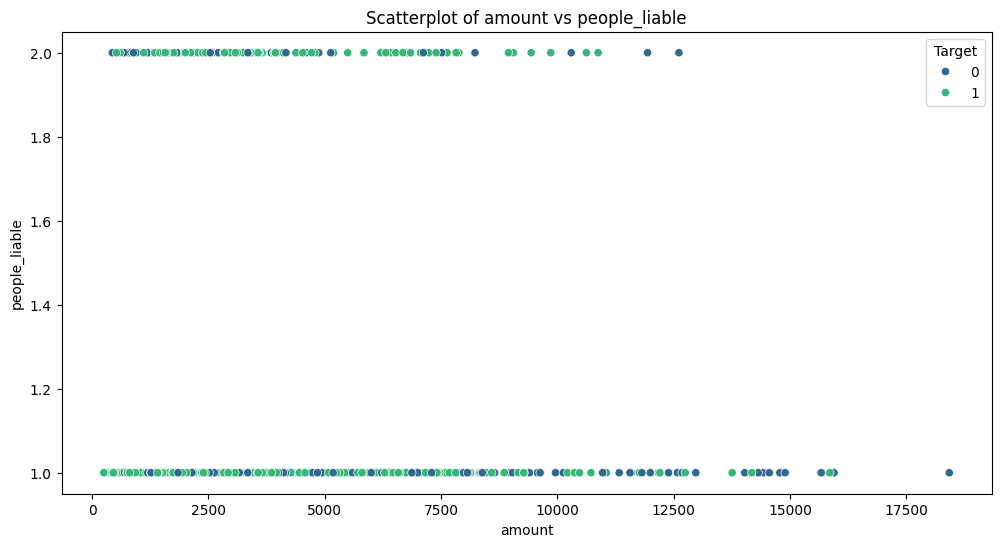

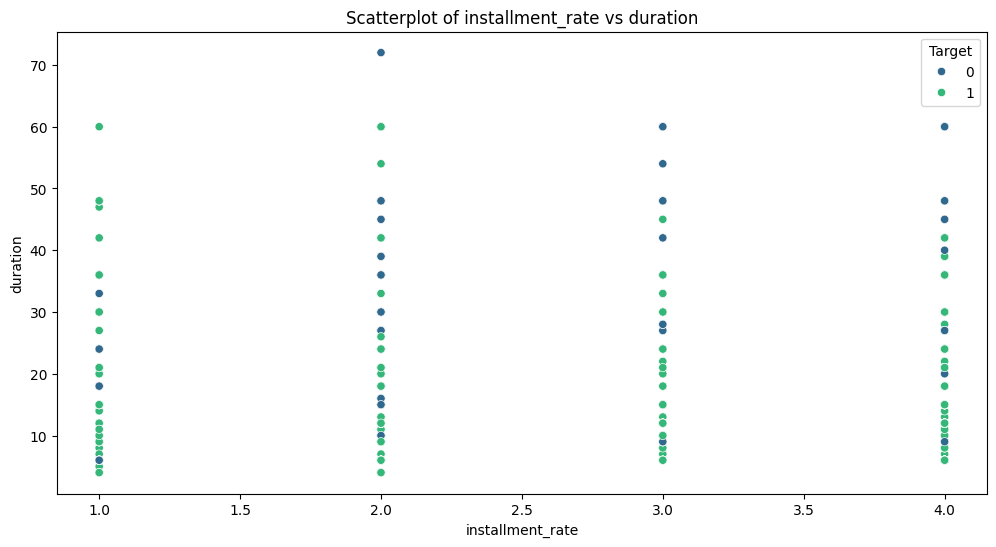

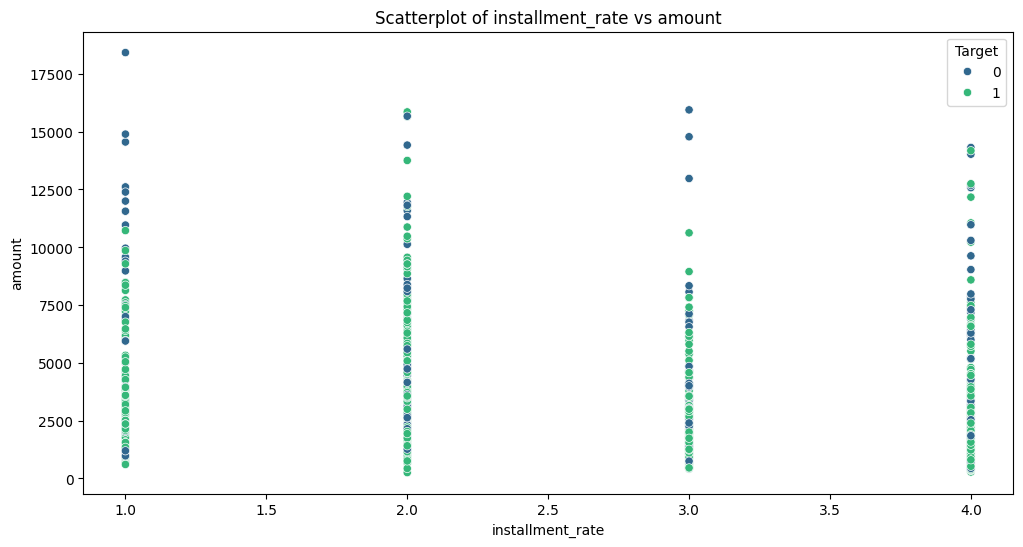

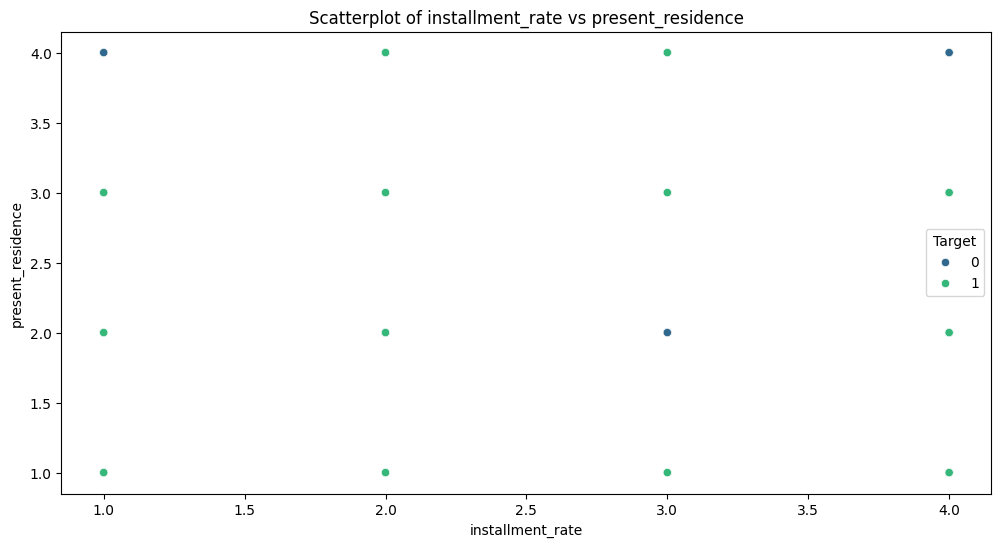

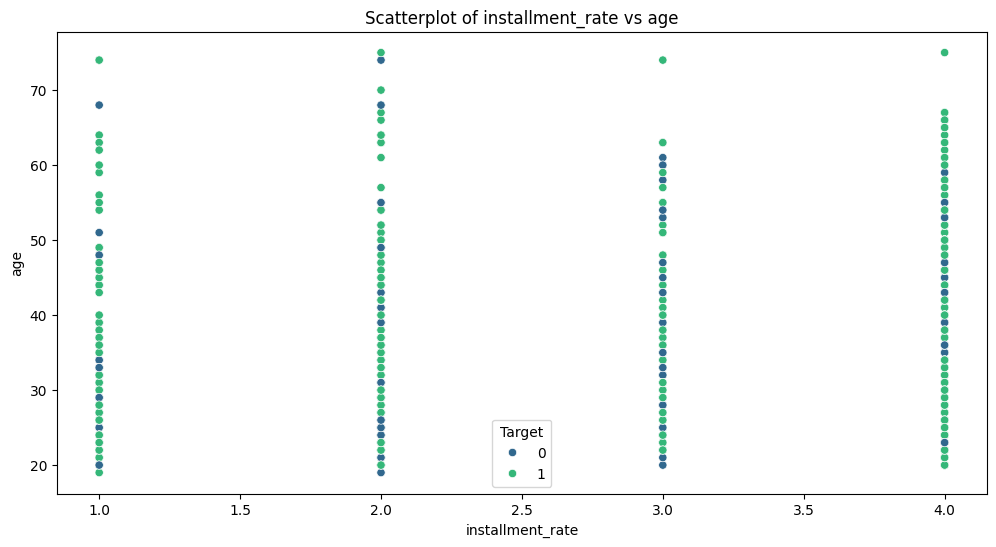

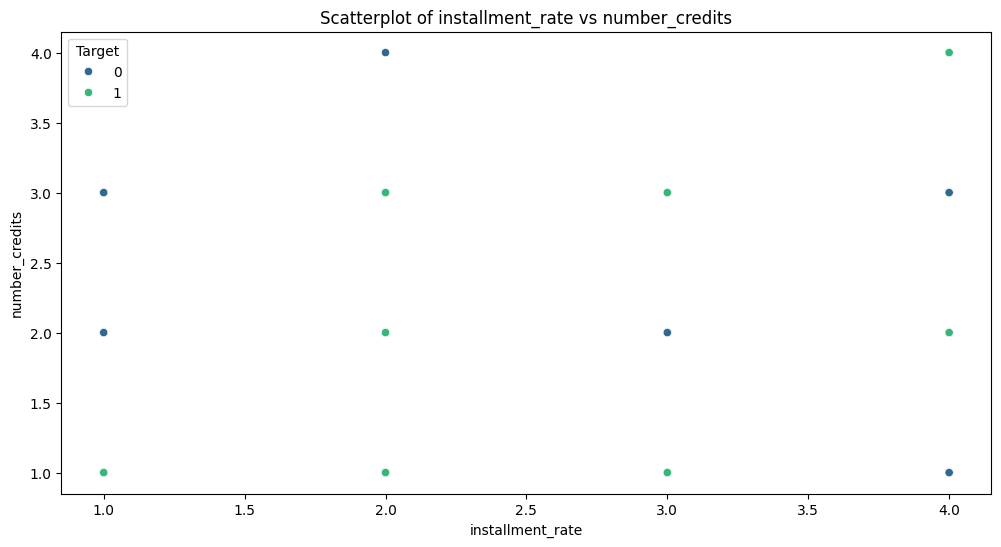

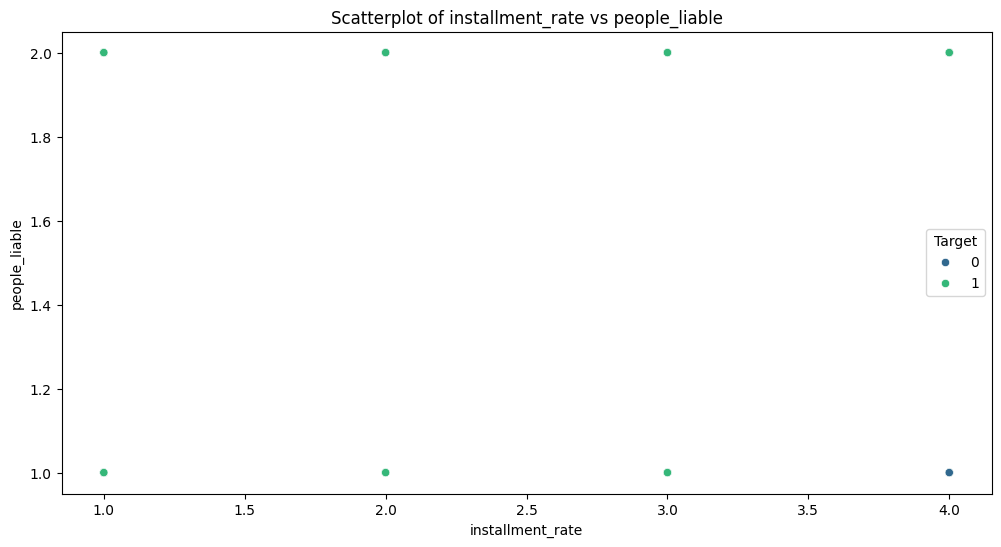

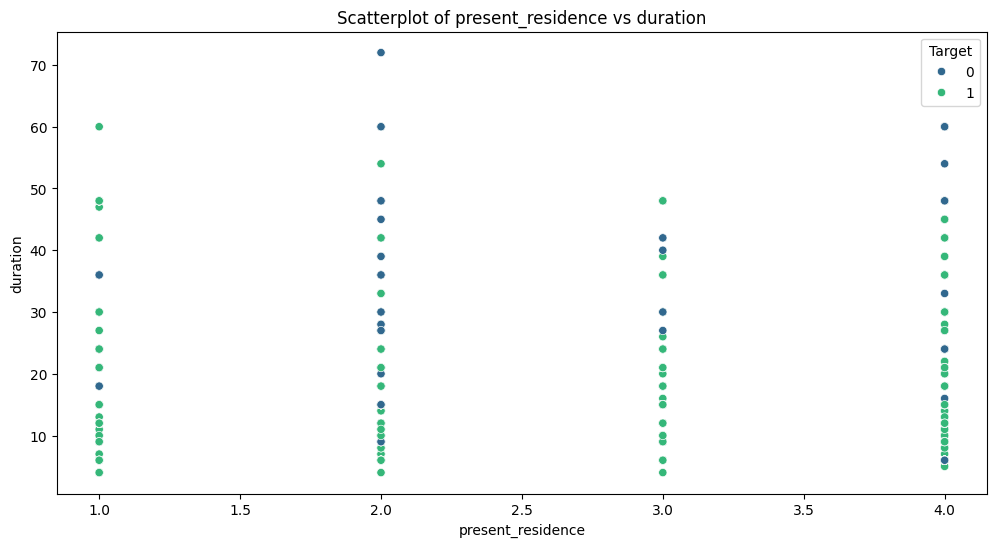

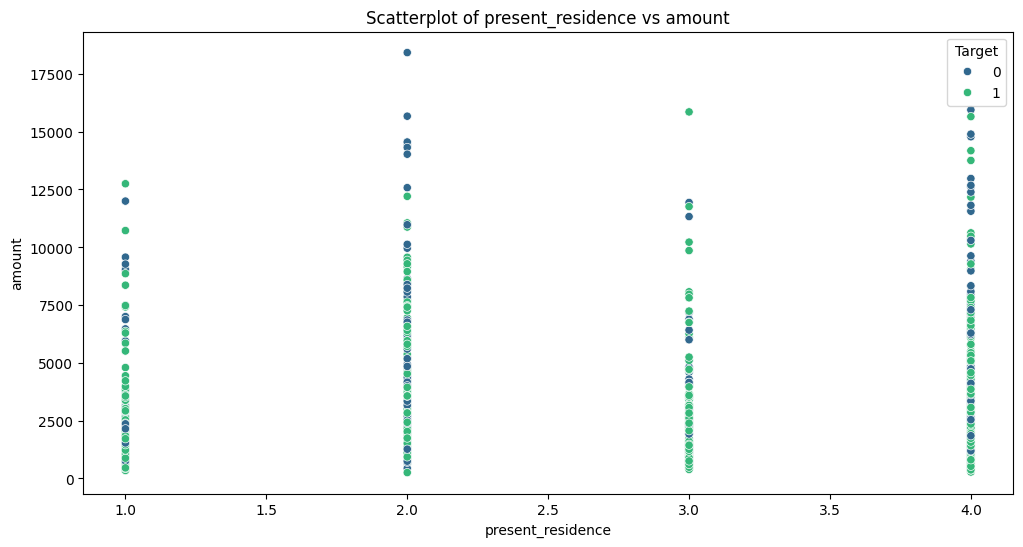

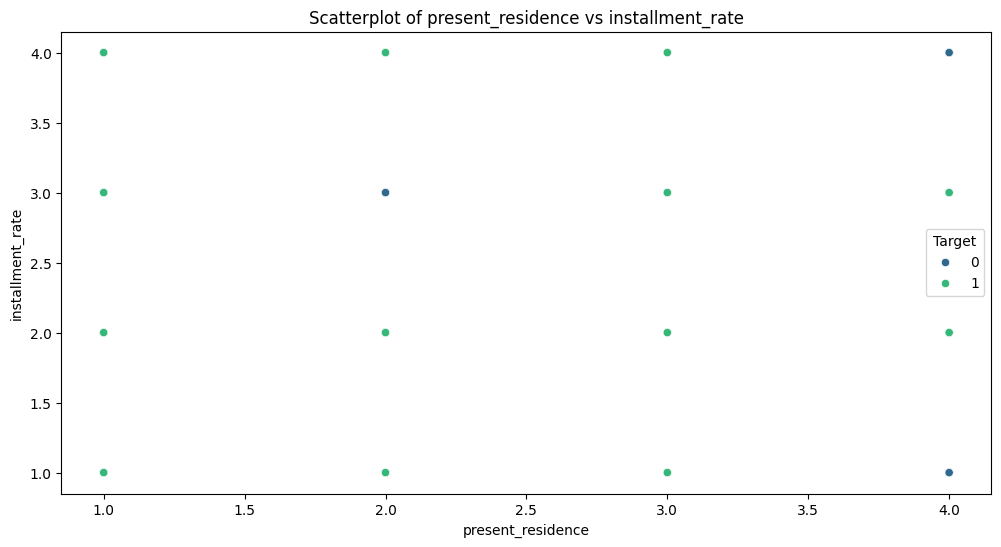

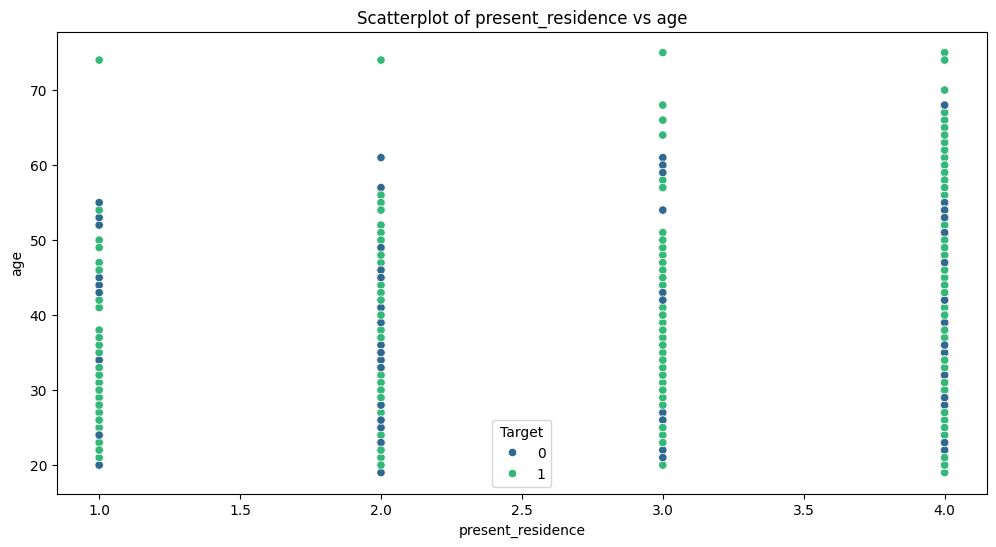

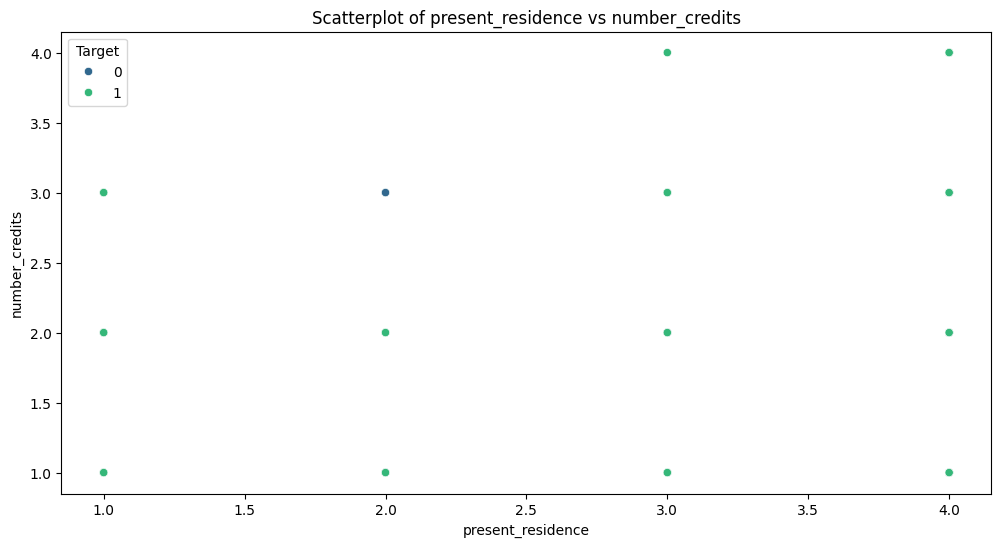

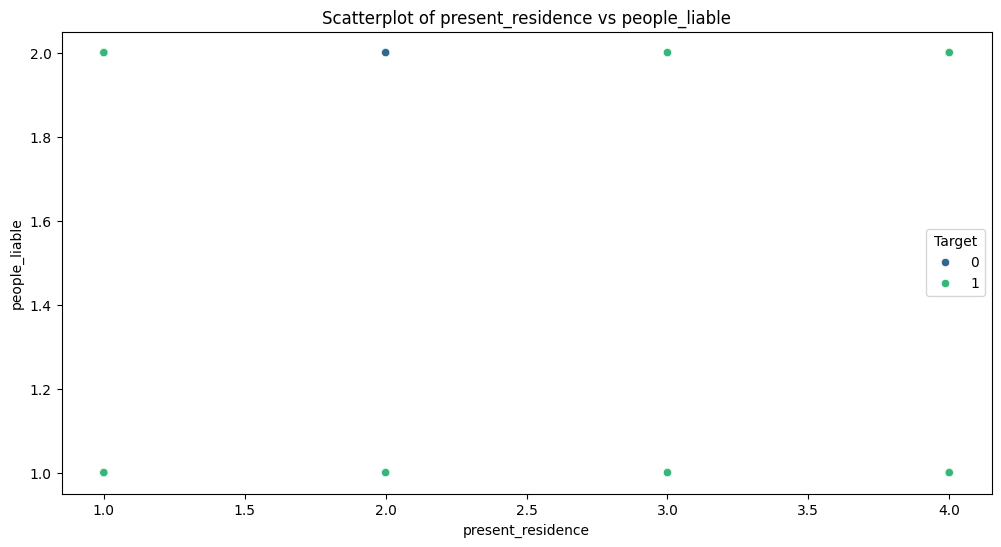

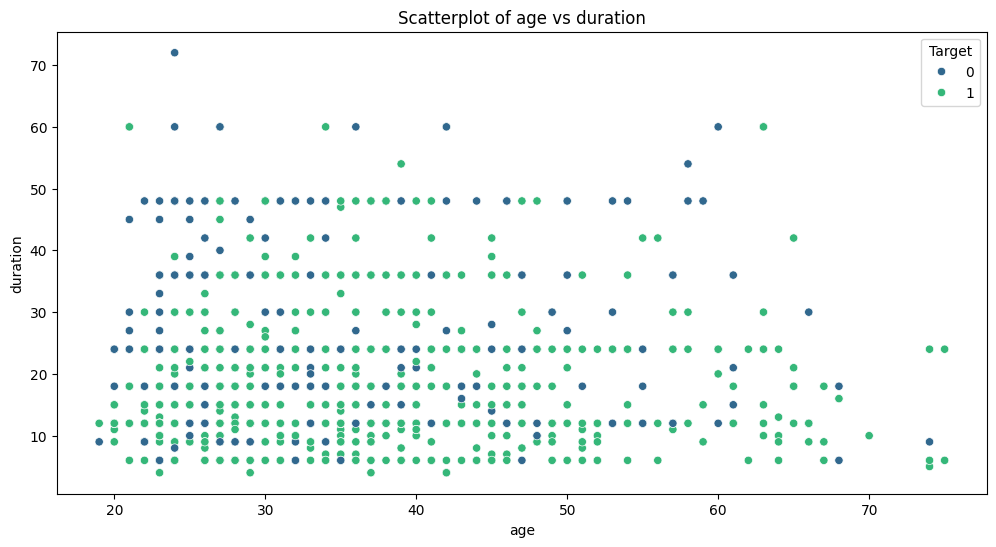

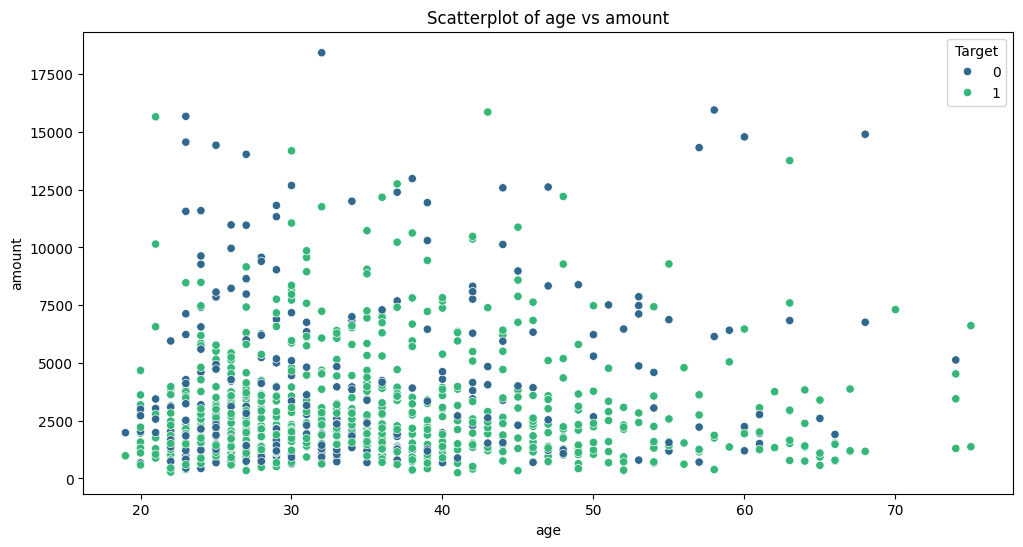

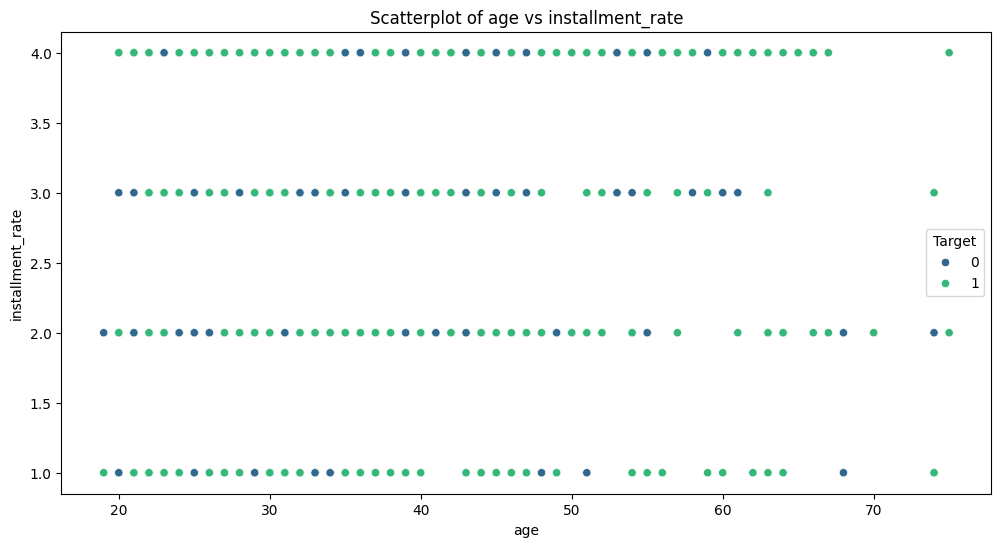

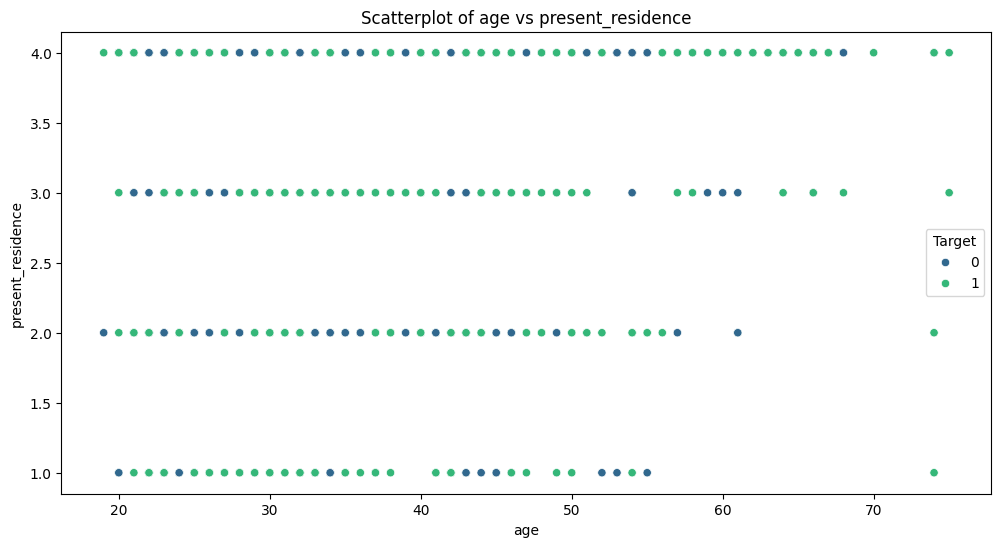

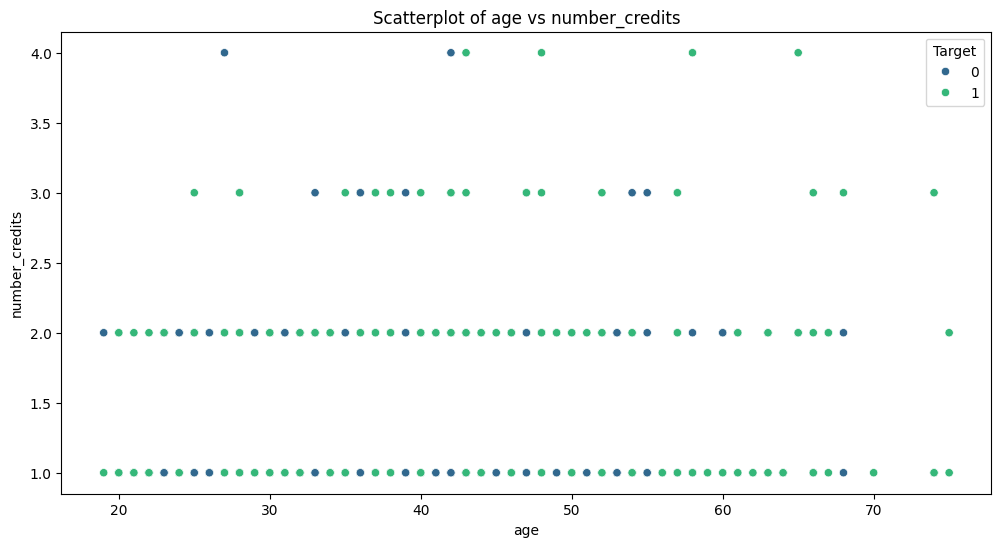

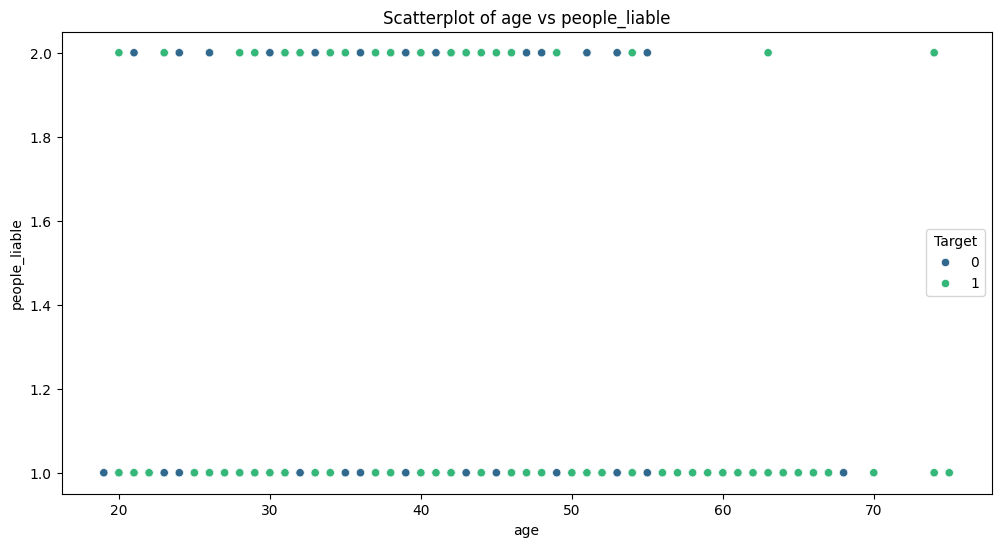

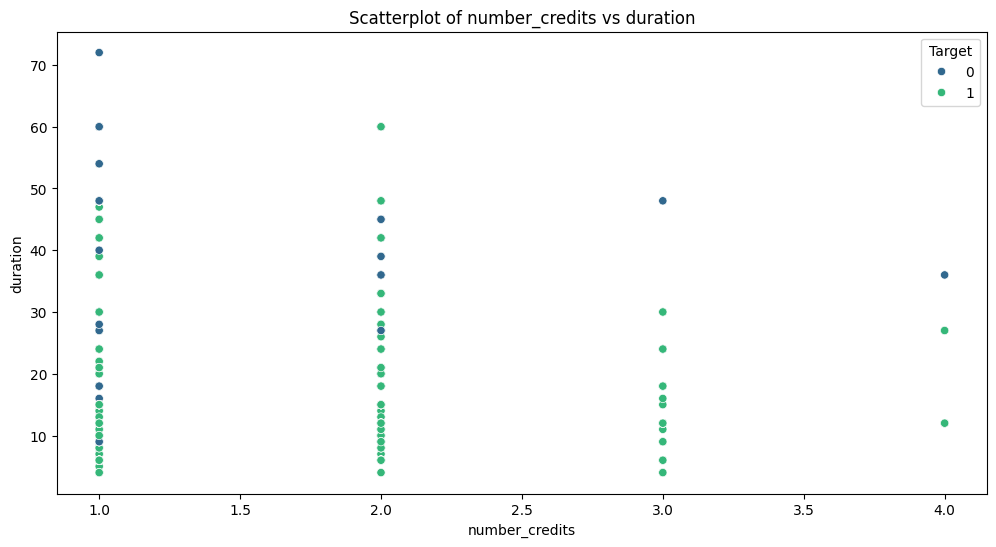

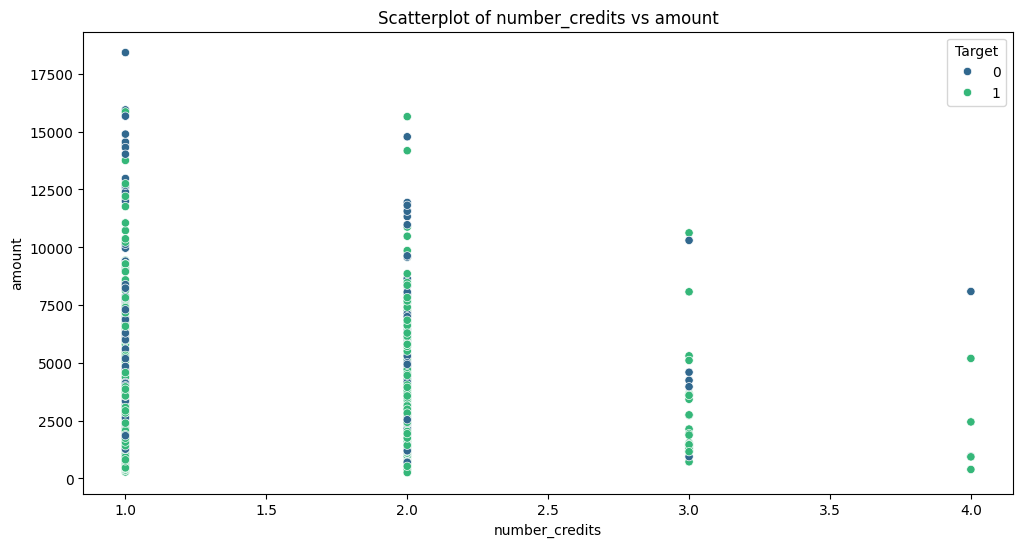

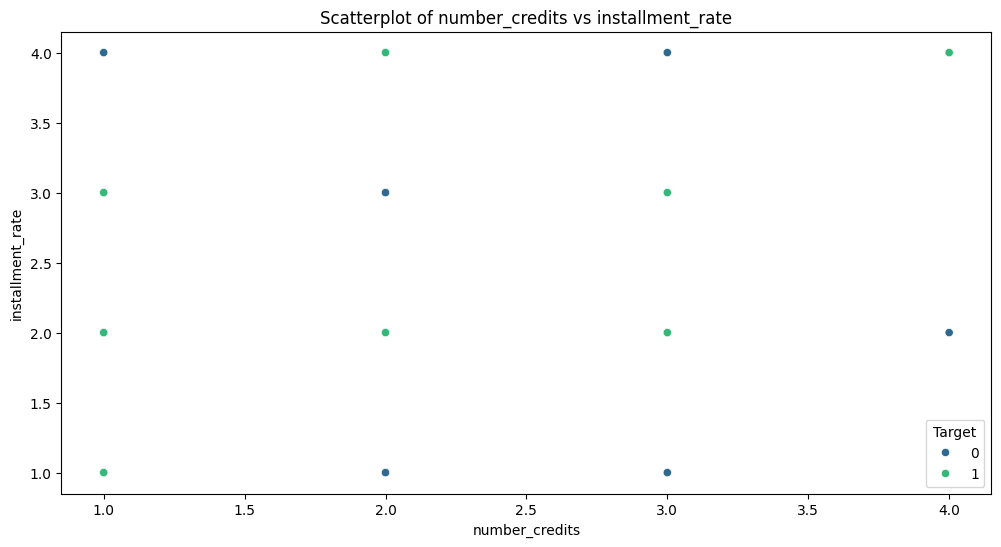

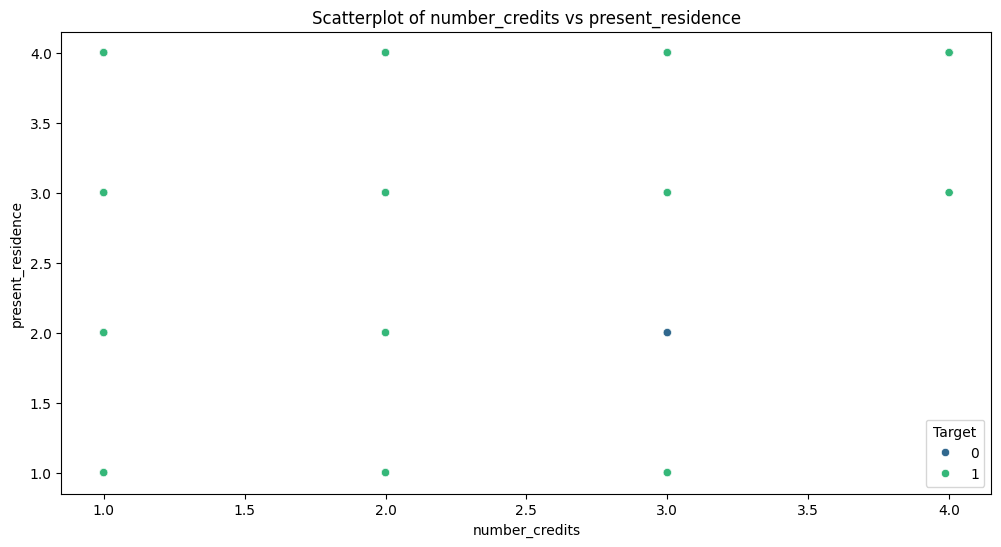

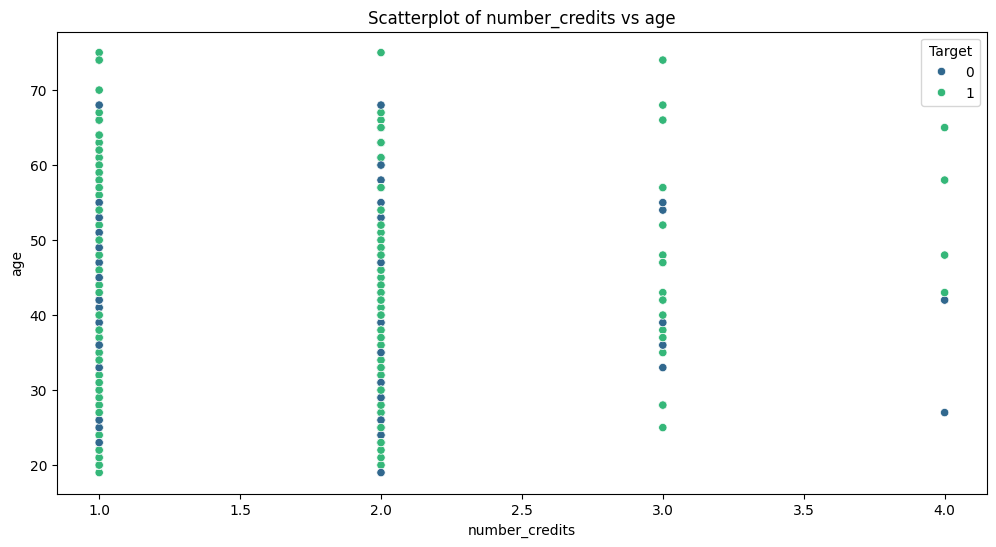

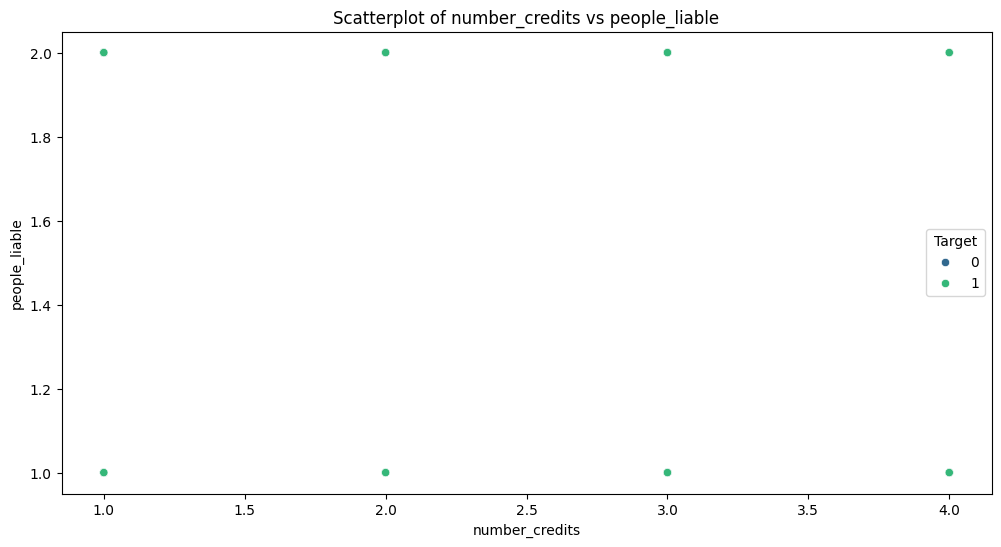

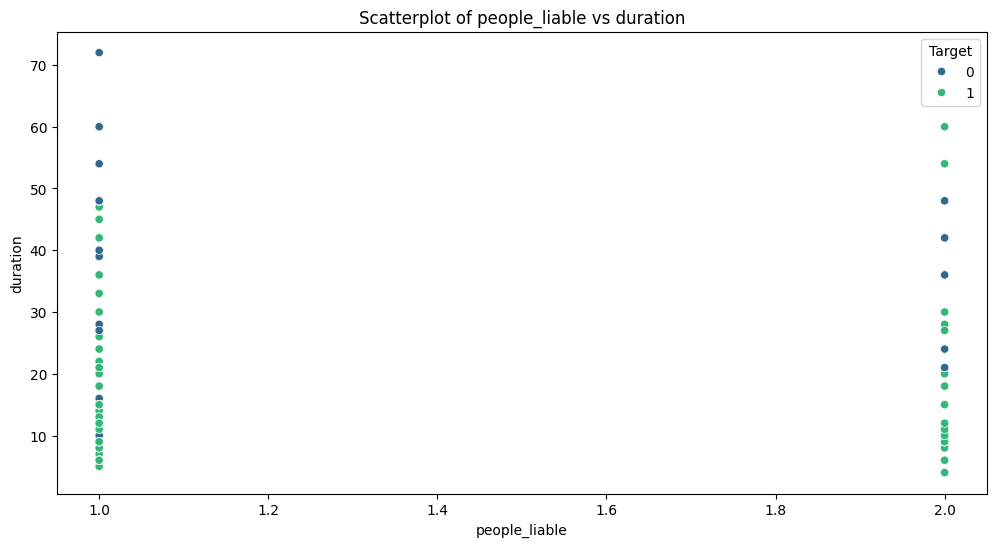

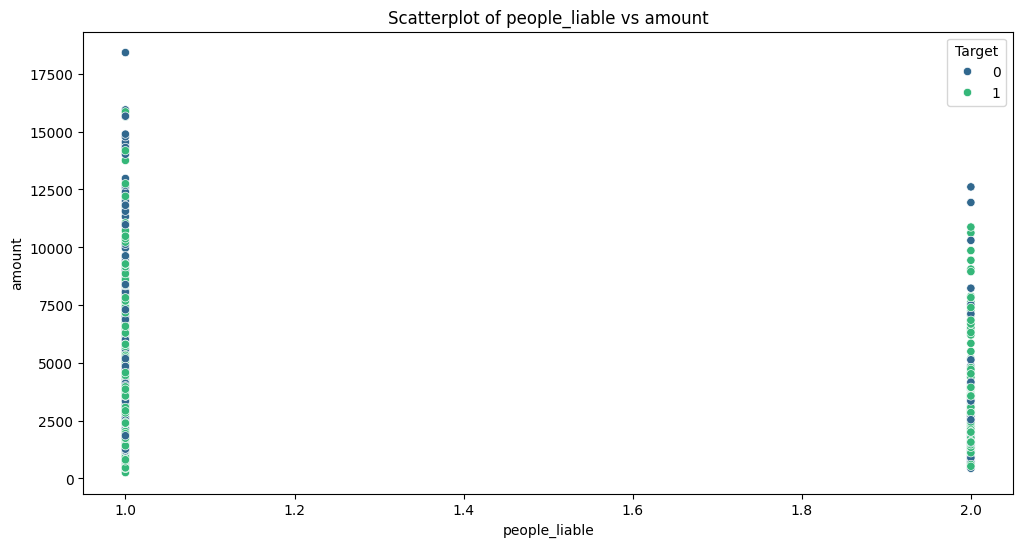

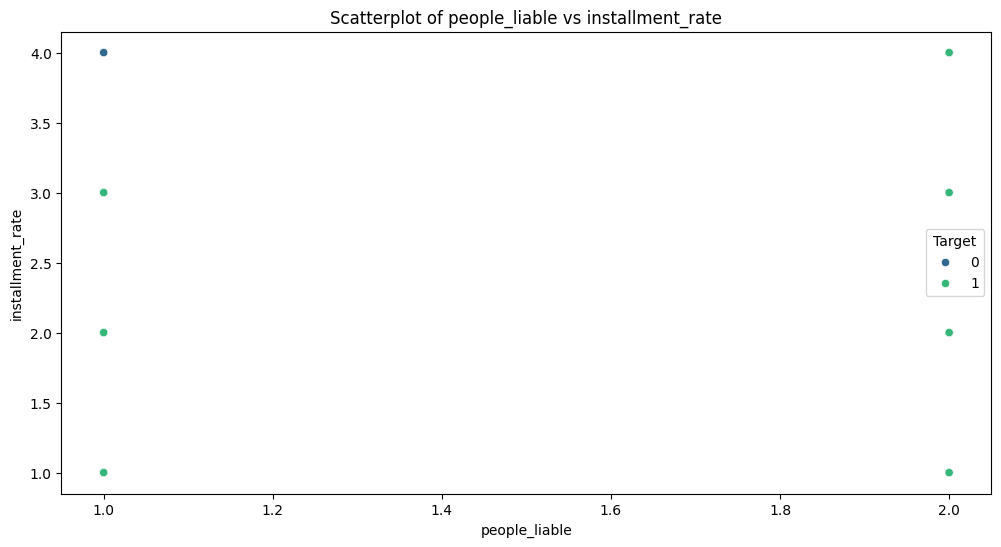

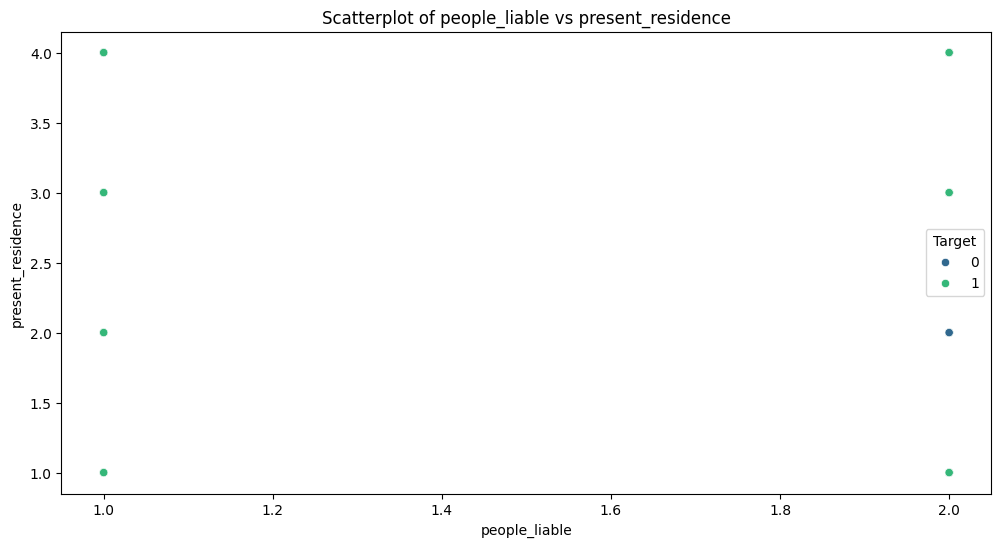

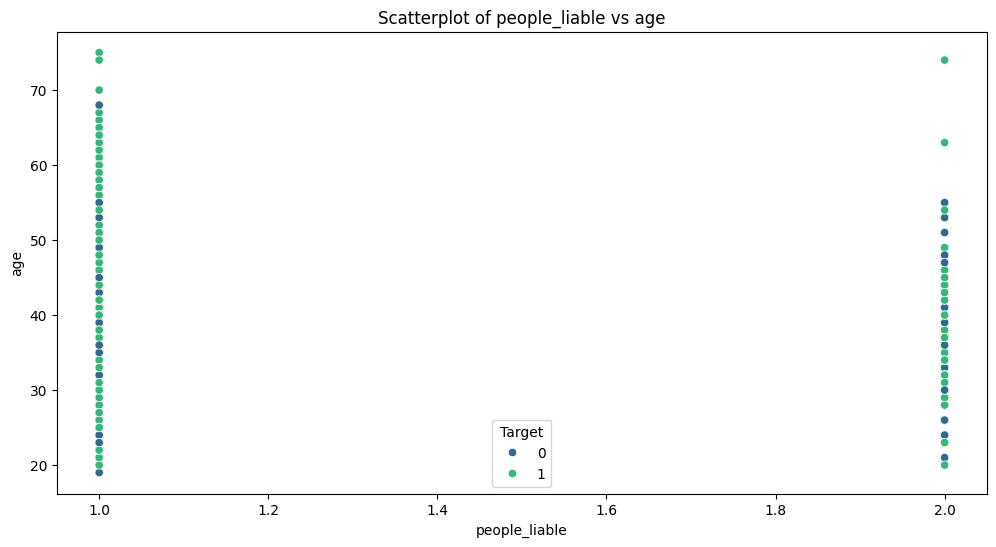

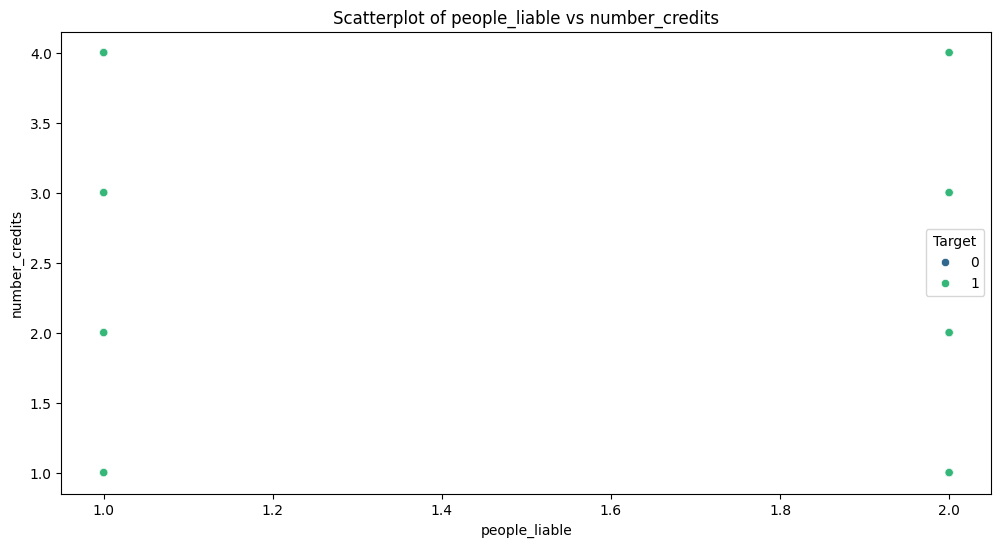

In [ ]:
# Vẽ biểu đồ scatterplot cho từng cặp thuộc tính số
for i, col1 in enumerate(numerical_columns):
    for j, col2 in enumerate(numerical_columns):
        if i != j:
            plt.figure(figsize=(12, 6))
            sns.scatterplot(x=df[col1], y=df[col2], hue=df['credit_risk'], palette='viridis')
            plt.title(f'Scatterplot of {col1} vs {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.legend(title='Target')
            plt.show()

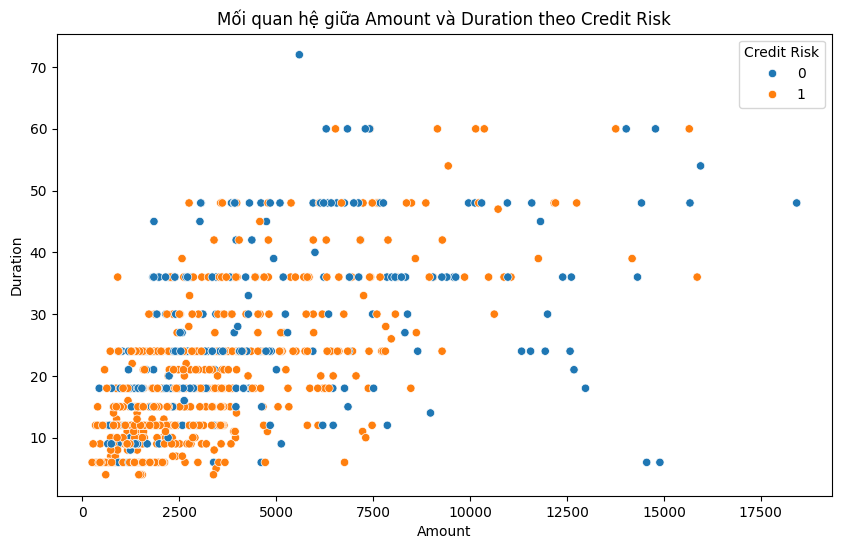

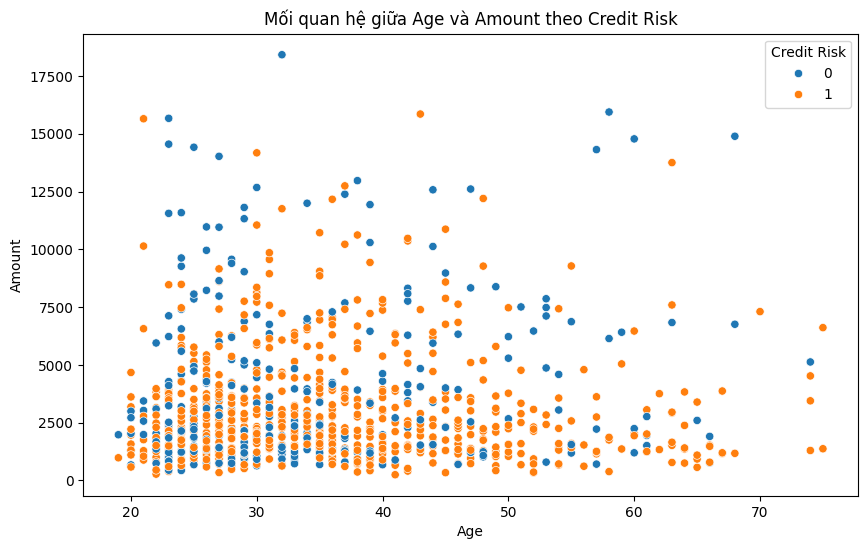

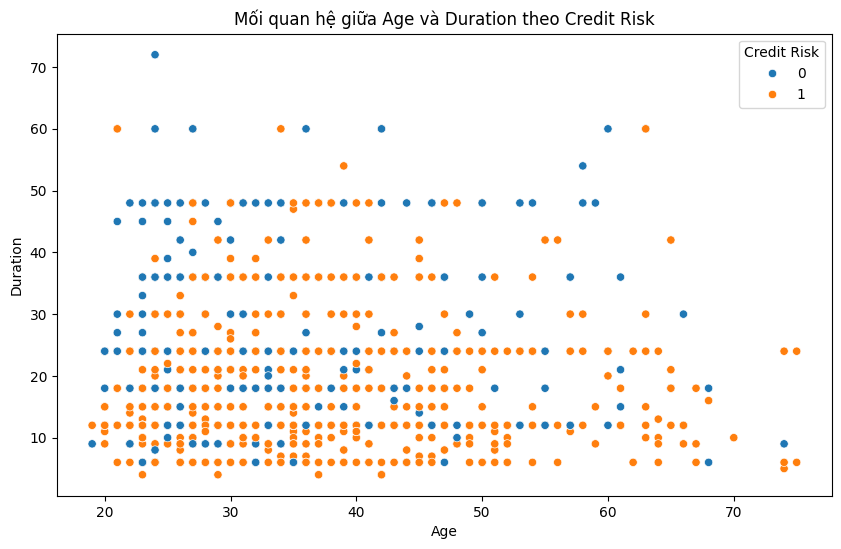

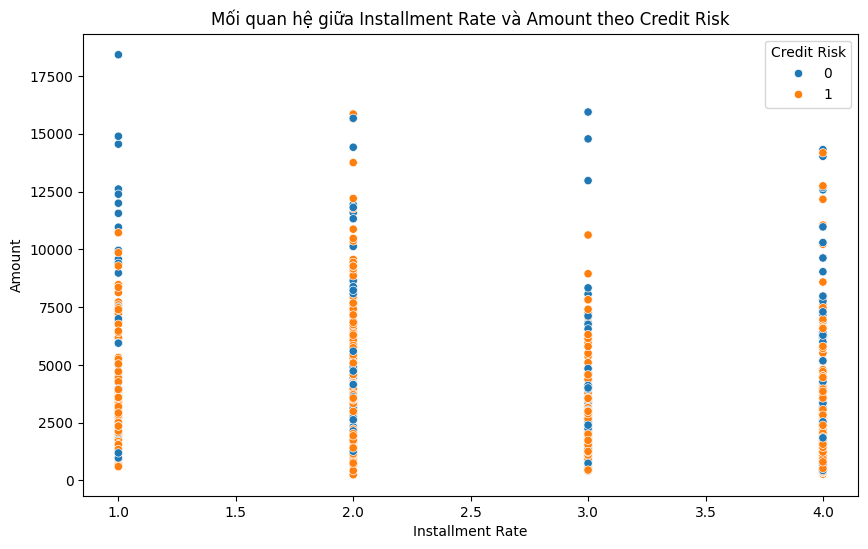

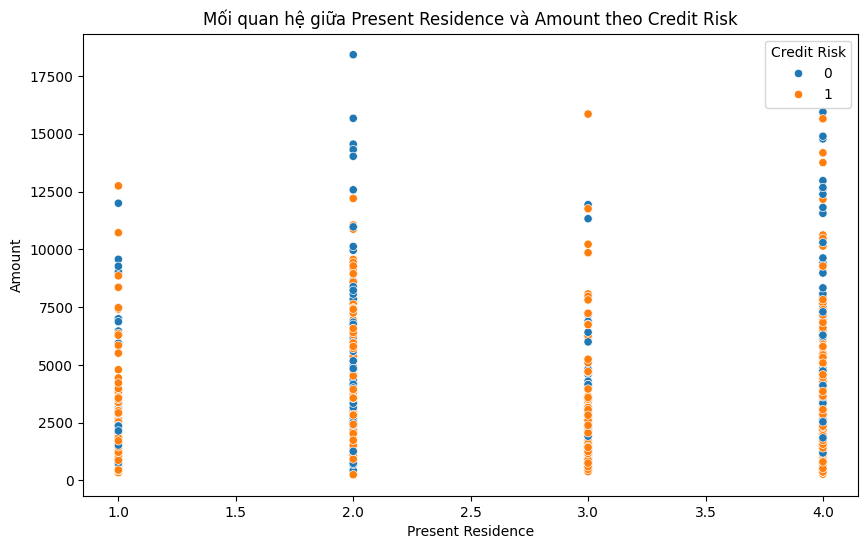

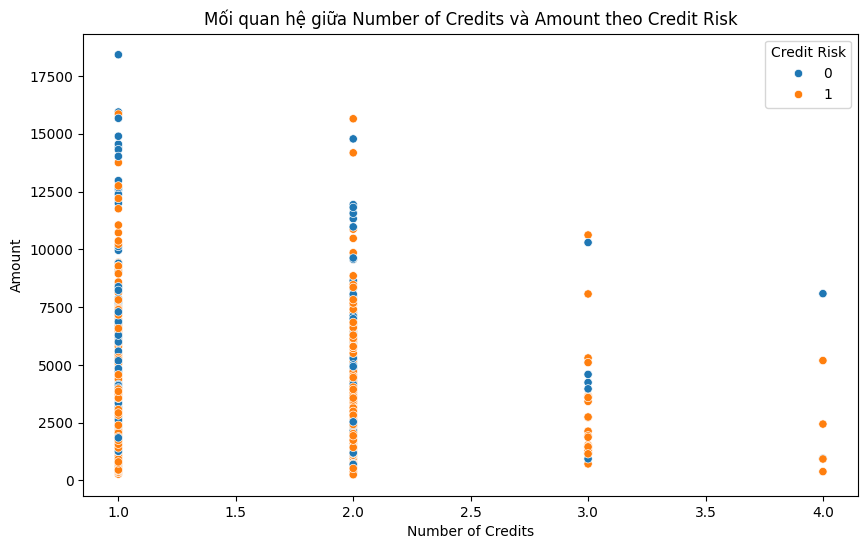

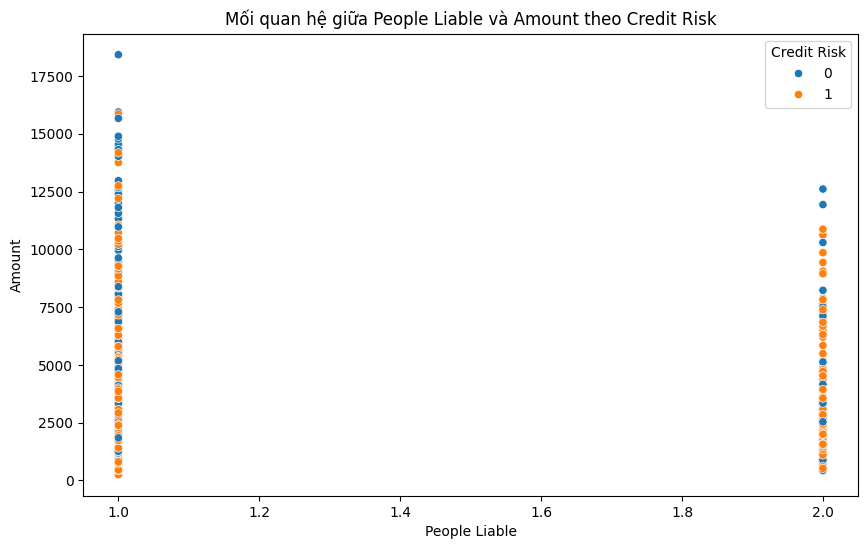

In [ ]:
# Danh sách các cột số và biến mục tiêu
numerical_columns = ['duration', 'amount', 'installment_rate', 'present_residence', 'age', 'number_credits', 'people_liable']
target_column = 'credit_risk'

# Scatterplot: amount vs. duration theo credit_risk
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='amount', y='duration', hue=target_column)
plt.title('Mối quan hệ giữa Amount và Duration theo Credit Risk')
plt.xlabel('Amount')
plt.ylabel('Duration')
plt.legend(title='Credit Risk')
plt.show()

# Scatterplot: age vs. amount theo credit_risk
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='amount', hue=target_column)
plt.title('Mối quan hệ giữa Age và Amount theo Credit Risk')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.legend(title='Credit Risk')
plt.show()

# Scatterplot: age vs. duration theo credit_risk
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='duration', hue=target_column)
plt.title('Mối quan hệ giữa Age và Duration theo Credit Risk')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.legend(title='Credit Risk')
plt.show()

# Scatterplot: installment_rate vs. amount theo credit_risk
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='installment_rate', y='amount', hue=target_column)
plt.title('Mối quan hệ giữa Installment Rate và Amount theo Credit Risk')
plt.xlabel('Installment Rate')
plt.ylabel('Amount')
plt.legend(title='Credit Risk')
plt.show()

# Scatterplot: present_residence vs. amount theo credit_risk
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='present_residence', y='amount', hue=target_column)
plt.title('Mối quan hệ giữa Present Residence và Amount theo Credit Risk')
plt.xlabel('Present Residence')
plt.ylabel('Amount')
plt.legend(title='Credit Risk')
plt.show()

# Scatterplot: number_credits vs. amount theo credit_risk
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='number_credits', y='amount', hue=target_column)
plt.title('Mối quan hệ giữa Number of Credits và Amount theo Credit Risk')
plt.xlabel('Number of Credits')
plt.ylabel('Amount')
plt.legend(title='Credit Risk')
plt.show()

# Scatterplot: people_liable vs. amount theo credit_risk
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='people_liable', y='amount', hue=target_column)
plt.title('Mối quan hệ giữa People Liable và Amount theo Credit Risk')
plt.xlabel('People Liable')
plt.ylabel('Amount')
plt.legend(title='Credit Risk')
plt.show()

PRE-PROCESS

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['duration','amount','installment_rate','present_residence','age','number_credits','people_liable']]=scaler.fit_transform(df[['duration','amount','installment_rate','present_residence','age','number_credits','people_liable']])

In [ ]:
df

status  duration                            credit_history  \
0           ... < 100 DM  0.029412   critical account/other credits existing   
1      0 <= ... < 200 DM  0.647059  existing credits paid back duly till now   
2    no checking account  0.117647   critical account/other credits existing   
3           ... < 100 DM  0.558824  existing credits paid back duly till now   
4           ... < 100 DM  0.294118           delay in paying off in the past   
..                   ...       ...                                       ...   
995  no checking account  0.117647  existing credits paid back duly till now   
996         ... < 100 DM  0.382353  existing credits paid back duly till now   
997  no checking account  0.117647  existing credits paid back duly till now   
998         ... < 100 DM  0.602941  existing credits paid back duly till now   
999    0 <= ... < 200 DM  0.602941   critical account/other credits existing   

                 purpose    amount                     savings  \
0    domestic appliances  0.050567  unknown/no savings account   
1    domestic appliances  0.313690                ... < 100 DM   
2             retraining  0.101574                ... < 100 DM   
3       radio/television  0.419941                ... < 100 DM   
4              car (new)  0.254209                ... < 100 DM   
..                   ...       ...                         ...   
995     radio/television  0.081765                ... < 100 DM   
996           car (used)  0.198470                ... < 100 DM   
997  domestic appliances  0.030483                ... < 100 DM   
998  domestic appliances  0.087763                ... < 100 DM   
999           car (used)  0.238032         100 <= ... < 500 DM   

    employment_duration  installment_rate  \
0        ... >= 7 years          1.000000   
1    1 <= ... < 4 years          0.333333   
2    4 <= ... < 7 years          0.333333   
3    4 <= ... < 7 years          0.333333   
4    1 <= ... < 4 years          0.666667   
..                  ...               ...   
995  4 <= ... < 7 years          0.666667   
996  1 <= ... < 4 years          1.000000   
997      ... >= 7 years          1.000000   
998  1 <= ... < 4 years          1.000000   
999          unemployed          0.666667   

                     personal_status_sex other_debtors  ...  \
0                          male : single          none  ...   
1    female : divorced/separated/married          none  ...   
2                          male : single          none  ...   
3                          male : single     guarantor  ...   
4                          male : single          none  ...   
..                                   ...           ...  ...   
995  female : divorced/separated/married          none  ...   
996            male : divorced/separated          none  ...   
997                        male : single          none  ...   
998                        male : single          none  ...   
999                        male : single          none  ...   

                                              property       age  \
0                                          real estate  0.857143   
1                                          real estate  0.053571   
2                                          real estate  0.535714   
3    building society savings agreement/life insurance  0.464286   
4                                  unknown/no property  0.607143   
..                                                 ...       ...   
995                                        real estate  0.214286   
996  building society savings agreement/life insurance  0.375000   
997                                       car or other  0.339286   
998                                unknown/no property  0.071429   
999                                       car or other  0.142857   

     other_installment_plans   housing number_credits  \
0                       none       own       0.333333   
1                       none       

In [ ]:
df.status=df.status.map({'... < 100 DM':0,'... >= 200 DM / salary for at least 1 year':1,'0 <= ... < 200 DM':2,'no checking account':3})
df.credit_history=df.credit_history.map({'all credits at this bank paid back duly':0,'critical account/other credits existing':1,'delay in paying off in the past':2,'existing credits paid back duly till now':3,'no credits taken/all credits paid back duly':4})
df.purpose=df.purpose.map({'business':0,'car (new)':1,'car (used)':2,'domestic appliances':3,'education':4,'furniture/equipment':5,'others':6,'radio/television':7,'repairs':8,'retraining':9})
df.savings=df.savings.map({'... < 100 DM':0,'100 <= ... < 500 DM':1,'500 <= ... < 1000 DM':2,'... >= 1000 DM':3,'unknown/no savings account':4})
df.employment_duration=df.employment_duration.map({'... < 1 year':0,'1 <= ... < 4 years':1,'4 <= ... < 7 years':2,'... >= 7 years':3,'unemployed':4})
df.personal_status_sex=df.personal_status_sex.map({'female : divorced/separated/married':0,'male : divorced/separated':1,'male : married/widowed':2,'male : single':3})
df.other_debtors=df.other_debtors.map({'co-applicant':0,'guarantor':1,'none':2})
df.property=df.property.map({'building society savings agreement/life insurance':0,'car or other':1,'real estate':2,'unknown/no property':3})
df.other_installment_plans=df.other_installment_plans.map({'bank':0,'none':1,'stores':2})
df.housing=df.housing.map({'for free':0,'own':1,'rent':2})
df.job=df.job.map({'management/self-employed/highly qualified employee/officer':0,'skilled employee/official':1,'unemployed/unskilled - non-resident':2,'unskilled - resident':3})
df.telephone=df.telephone.map({'yes':0,'own':1,'no':2})
df.foreign_worker=df.foreign_worker.map({'yes':0,'own':1,'no':2})

In [ ]:
df

status  duration  credit_history  purpose    amount  savings  \
0         0  0.029412               1        3  0.050567        4   
1         2  0.647059               3        3  0.313690        0   
2         3  0.117647               1        9  0.101574        0   
3         0  0.558824               3        7  0.419941        0   
4         0  0.294118               2        1  0.254209        0   
..      ...       ...             ...      ...       ...      ...   
995       3  0.117647               3        7  0.081765        0   
996       0  0.382353               3        2  0.198470        0   
997       3  0.117647               3        3  0.030483        0   
998       0  0.602941               3        3  0.087763        0   
999       2  0.602941               1        2  0.238032        1   

     employment_duration  installment_rate  personal_status_sex  \
0                      3          1.000000                    3   
1                      1          0.333333                    0   
2                      2          0.333333                    3   
3                      2          0.333333                    3   
4                      1          0.666667                    3   
..                   ...               ...                  ...   
995                    2          0.666667                    0   
996                    1          1.000000                    1   
997                    3          1.000000                    3   
998                    1          1.000000                    3   
999                    4          0.666667                    3   

     other_debtors  ...  property       age  other_installment_plans  housing  \
0                2  ...         2  0.857143                        1        1   
1                2  ...         2  0.053571                        1        1   
2                2  ...         2  0.535714                        1        1   
3                1  ...         0  0.464286                        1        0   
4                2  ...         3  0.607143                        1        0   
..             ...  ...       ...       ...                      ...      ...   
995              2  ...         2  0.214286                        1        1   
996              2  ...         0  0.375000                        1        1   
997              2  ...         1  0.339286                        1        1   
998              2  ...         3  0.071429                        1        0   
999              2  ...         1  0.142857                        1        1   

     number_credits  job  people_liable  telephone  foreign_worker  \
0          0.333333    1            0.0          0               0   
1          0.000000    1            0.0          2               0   
2          0.000000    3            1.0          2               0   
3          0.000000    1            1.0          2               0   
4          0.333333    1            1.0          2               0   
..              ...  ...            ...        ...             ...   
995        0.000000    3            0.0          2               0   
996        0.000000    0            0.0          0               0   
997        0.000000    1            0.0          2               0   
998        0.000000    1            0.0          0               0   
999        0.000000    1            0.0          2               0   

     credit_risk  
0              1  
1              0  
2              1  
3              1  
4              0  
..           ...  
995            1  
996            1  
997            1  
998            0  
999            1  

[1000 rows x 21 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   1000 non-null   int64  
 1   duration                 1000 non-null   float64
 2   credit_history           1000 non-null   int64  
 3   purpose                  1000 non-null   int64  
 4   amount                   1000 non-null   float64
 5   savings                  1000 non-null   int64  
 6   employment_duration      1000 non-null   int64  
 7   installment_rate         1000 non-null   float64
 8   personal_status_sex      1000 non-null   int64  
 9   other_debtors            1000 non-null   int64  
 10  present_residence        1000 non-null   float64
 11  property                 1000 non-null   int64  
 12  age                      1000 non-null   float64
 13  other_installment_plans  1000 non-null   int64  
 14  housing                  

PROCESS


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="credit_risk", axis = 1)
y = df['credit_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

###TrainModel

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

res = pd.DataFrame(columns=['Accuracy'])

svc = SVC()
knnc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
res.loc["SVC"] = accuracy_score(y_test, y_pred)

knnc.fit(X_train, y_train)
y_pred = knnc.predict(X_test)
res.loc["KNN"] = accuracy_score(y_test, y_pred)

dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
res.loc["DecisionTree"] = accuracy_score(y_test, y_pred)

display(res)

Accuracy
SVC           0.696667
KNN           0.666667
DecisionTree  0.686667

###Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

class Ensemble():
  def __init__(self, base_models={"SVC": SVC(), "KNN": KNeighborsClassifier(), "DecisionTree": DecisionTreeClassifier()}, meta_model=LogisticRegression(), dataset=pd.notnull):
    self.meta_model=meta_model
    self.ds = dataset
    self.X = df.drop(columns="credit_risk", axis = 1)
    self.y = df['credit_risk']
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    self.models = list()
    for name, model in base_models.items():
      self.models.append((name, model))

  def fit(self):
    self.stack_model = StackingClassifier(estimators=self.models, final_estimator=self.meta_model, cv=5)
    self.stack_model.fit(self.X_train, self.y_train)

  def predict(self, X_pred):
    return self.stack_model.predict(X_pred)

In [ ]:
from sklearn.metrics import accuracy_score

model = Ensemble(dataset=df)
model.fit()
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.74


###Deep Learning

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),
    Dense(units=64, activation='relu'),
    Dropout(rate=0.2),
    Dense(units=64, activation='relu'),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='huber_loss', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=64, verbose=1,callbacks=[early_stopping])

Epoch 1/100
9/9 [==============================] - 1s 37ms/step - loss: 0.2479 - accuracy: 0.5482 - val_loss: 0.1773 - val_accuracy: 0.6929
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1658 - accuracy: 0.6625 - val_loss: 0.1150 - val_accuracy: 0.6143
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1484 - accuracy: 0.5482 - val_loss: 0.1113 - val_accuracy: 0.6214
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1254 - accuracy: 0.6625 - val_loss: 0.1164 - val_accuracy: 0.6929
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1210 - accuracy: 0.6768 - val_loss: 0.1055 - val_accuracy: 0.6714
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1087 - accuracy: 0.6643 - val_loss: 0.1039 - val_accuracy: 0.6643
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1134 - accuracy: 0.6804 - val_loss: 0.1033 - val_accuracy: 0.6571
Epoch 8/100
9/9 [=========

In [ ]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 2ms/step - loss: 0.0918 - accuracy: 0.7257


[0.0918305441737175, 0.7257142663002014]

In [ ]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.0978 - accuracy: 0.7300


[0.09776659309864044, 0.7300000190734863]

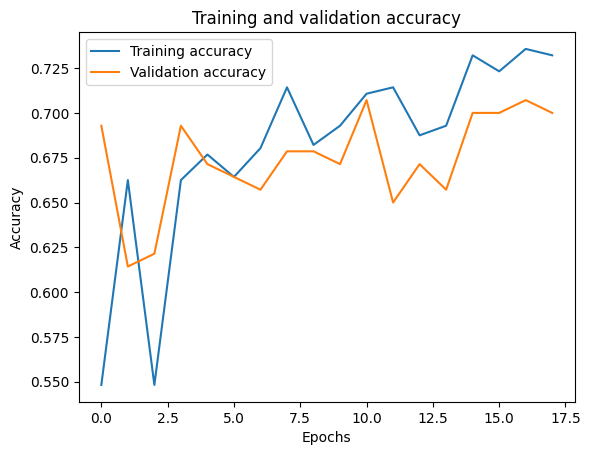

Text(0.5, 1.0, 'Training and Validation Loss')

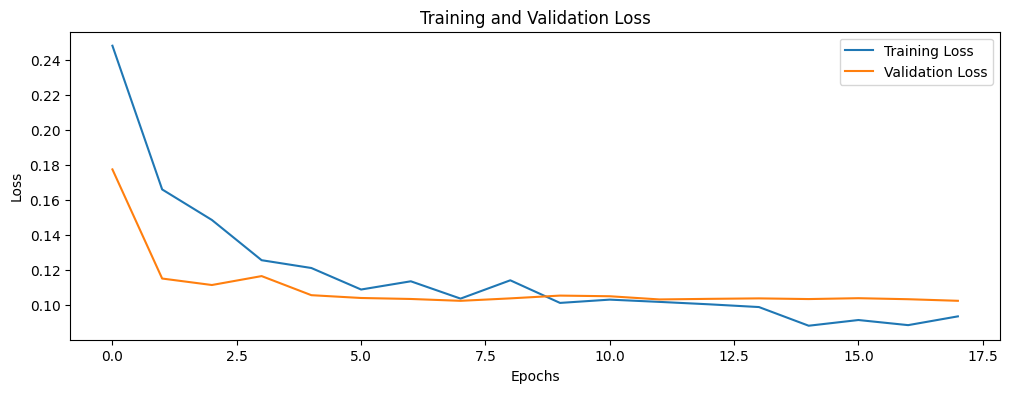

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Vẽ biểu đồ accuracy
epochs = range(1, len(train_accuracy) + 1)
plt.plot(train_accuracy, label='Training accuracy')
plt.plot(val_accuracy,label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.figure(figsize=(12, 4))


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')